### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import RFE


import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

### delete the duplicate values

In [4]:
dataset.drop_duplicates(inplace=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
null_value_count = round(100*(dataset.isnull().sum()/len(dataset)), 2)
columns_missing_half_values =null_value_count[null_value_count>50]
dataset.drop(columns_missing_half_values.index,inplace=True,axis=1)

In [7]:
### drop id column as it makes no sense for keeping it
dataset.drop("Id",inplace=True,axis=1)


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Replacing all the missing values with the median value


In [9]:
dataset = dataset.fillna(dataset.median())


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

#### Calculating the missing values count

In [11]:
null_value_count = round(100*(dataset.isnull().sum()/len(dataset)), 2)
columns_missing_half_values =null_value_count[null_value_count>0]
columns_missing_half_values

MasVnrType       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

In [12]:
mean_data ={key:dataset[key].value_counts(ascending=False).index[0] for key in columns_missing_half_values.index }

dataset[columns_missing_half_values.index] = dataset[columns_missing_half_values.index].fillna(mean_data)


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

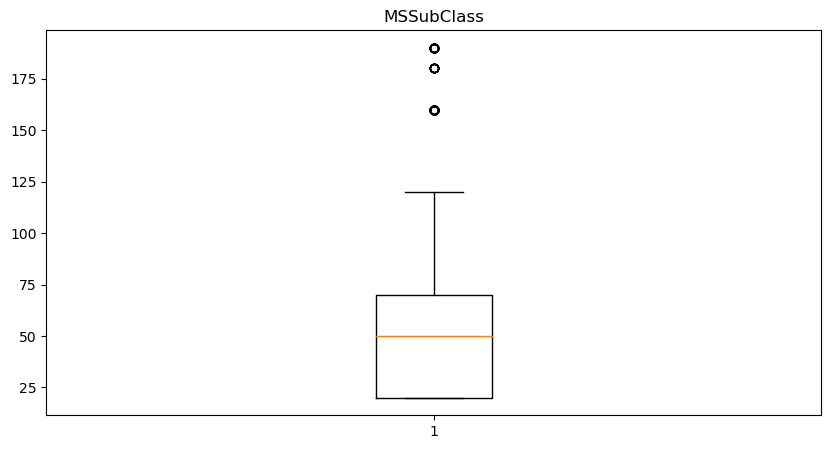

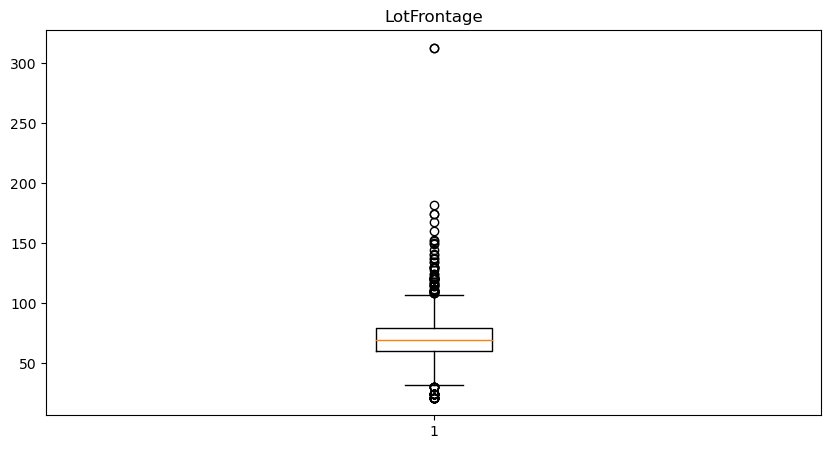

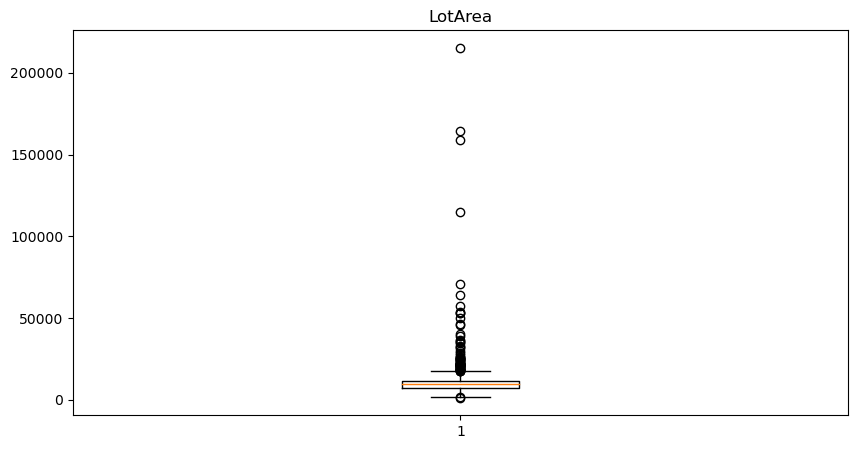

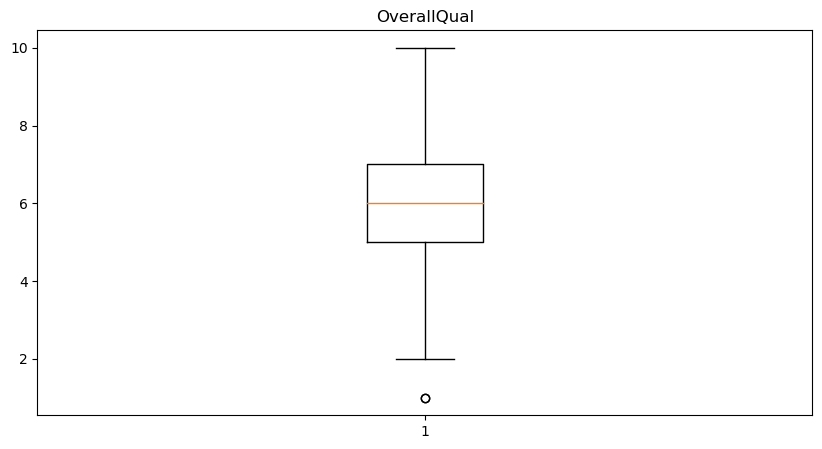

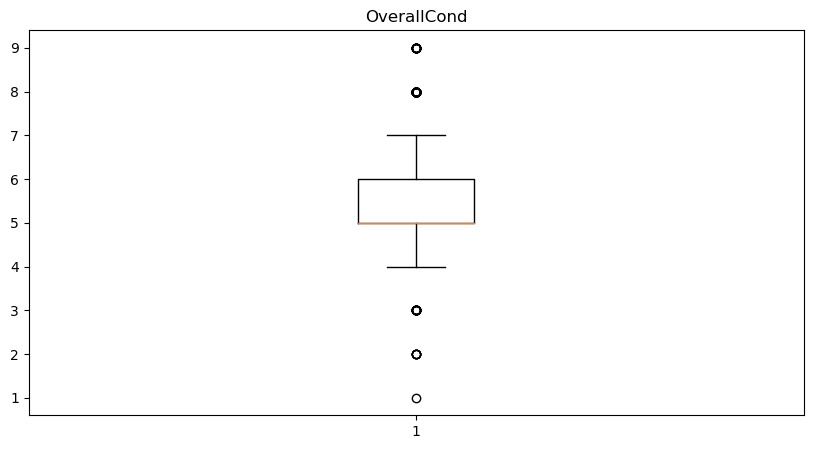

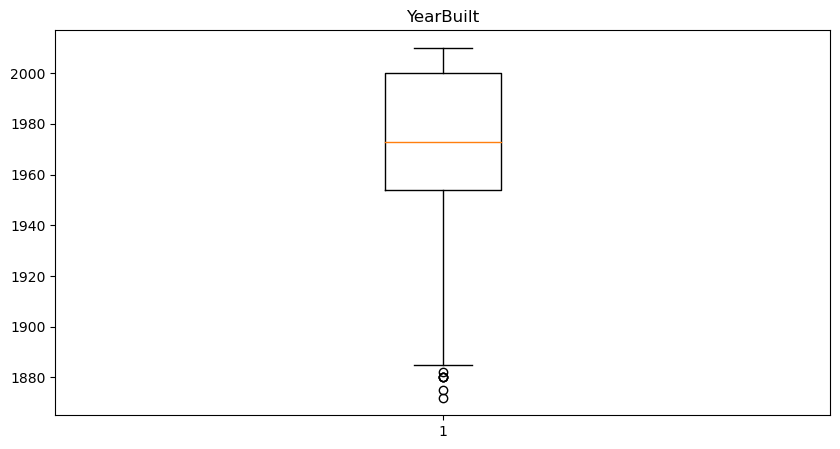

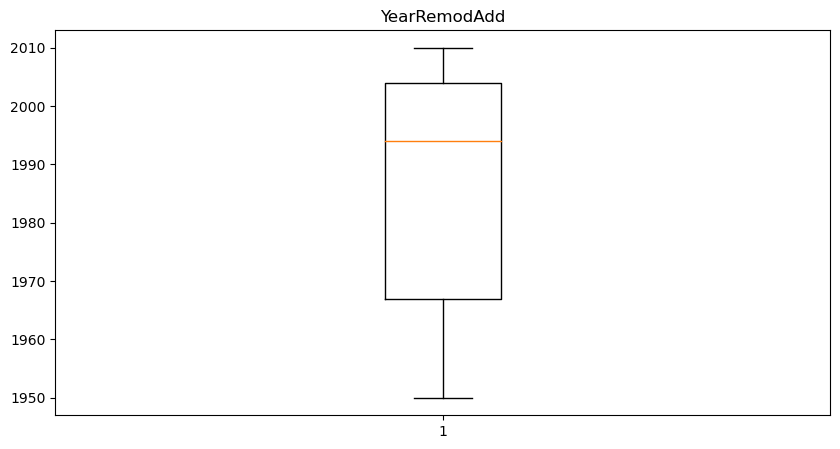

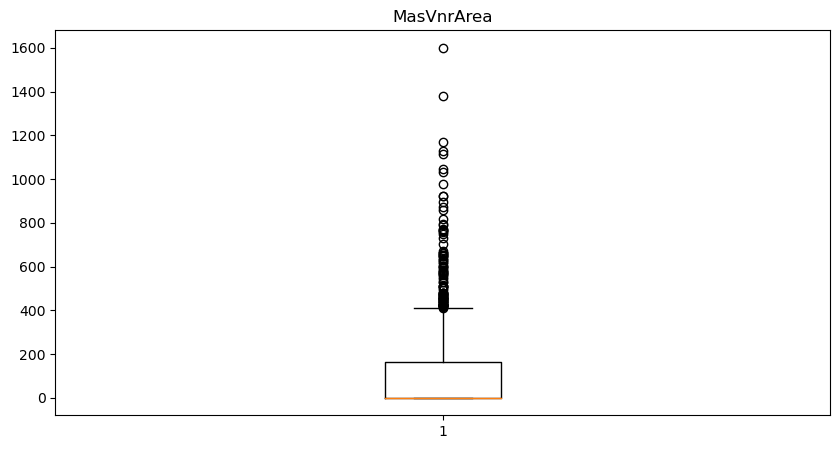

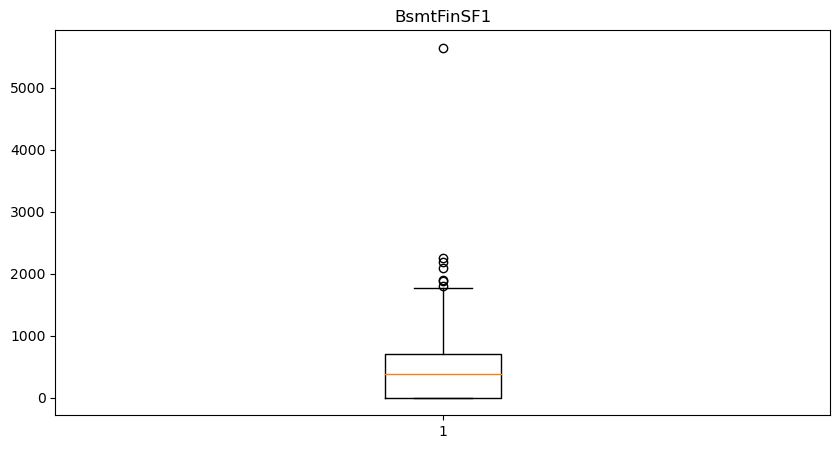

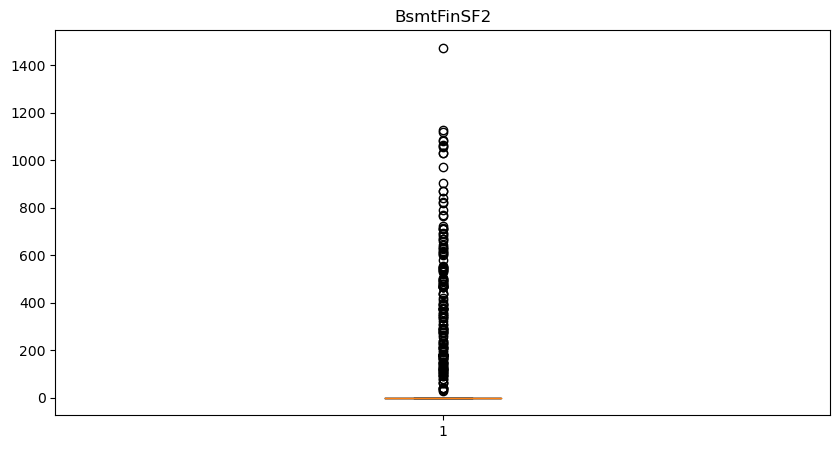

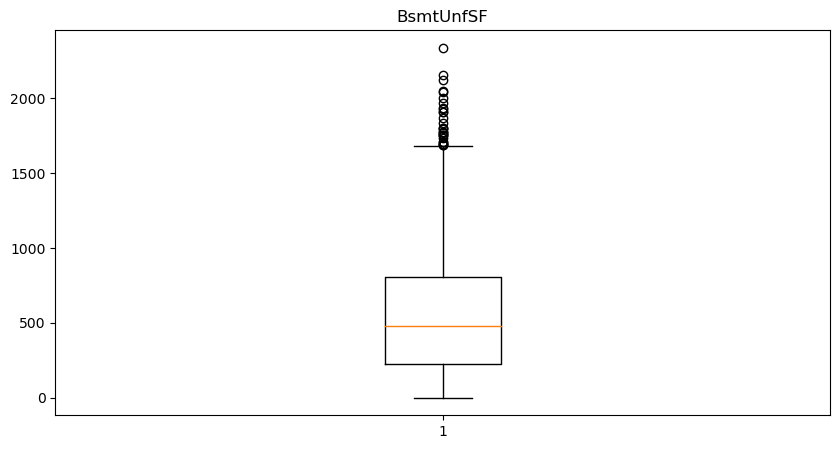

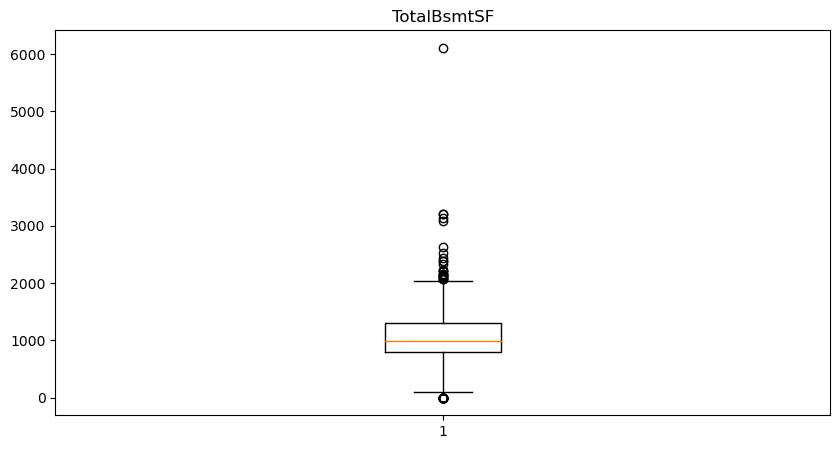

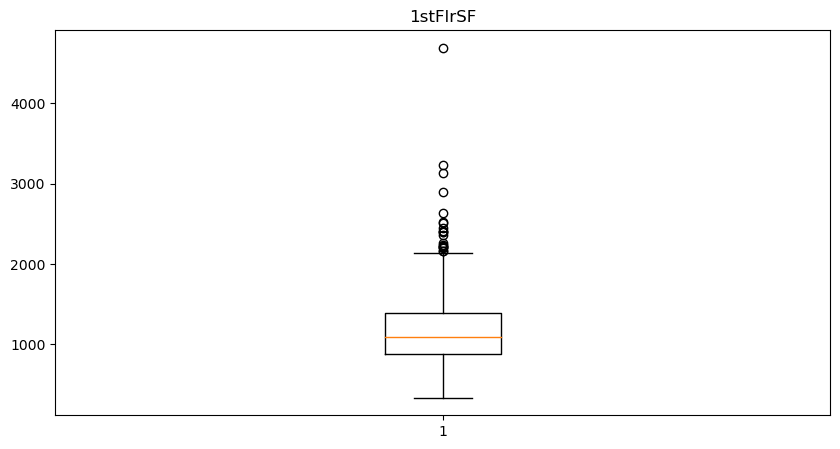

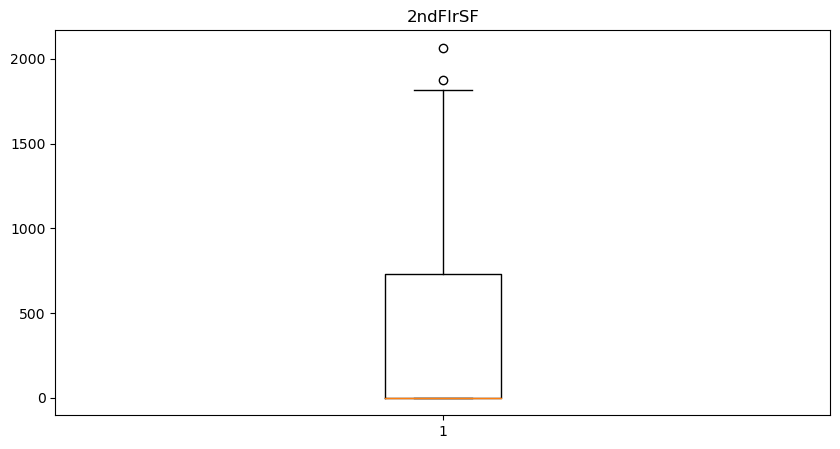

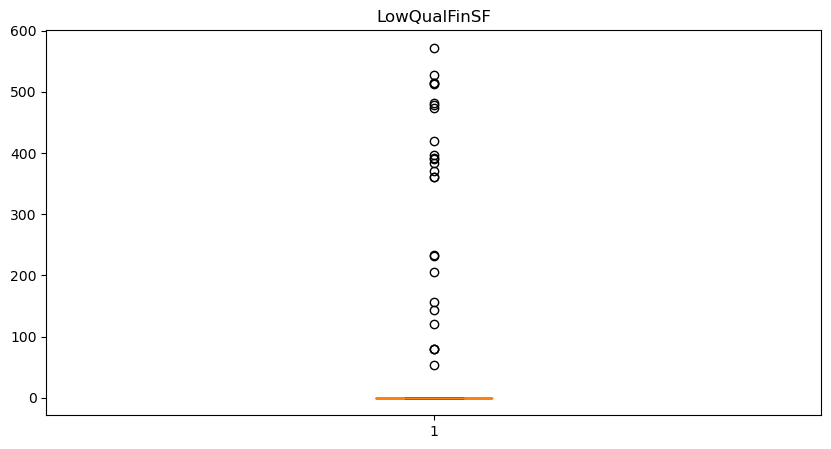

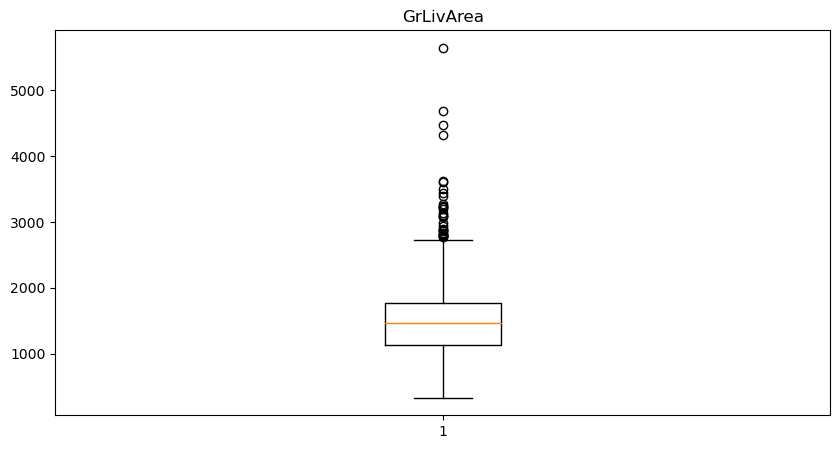

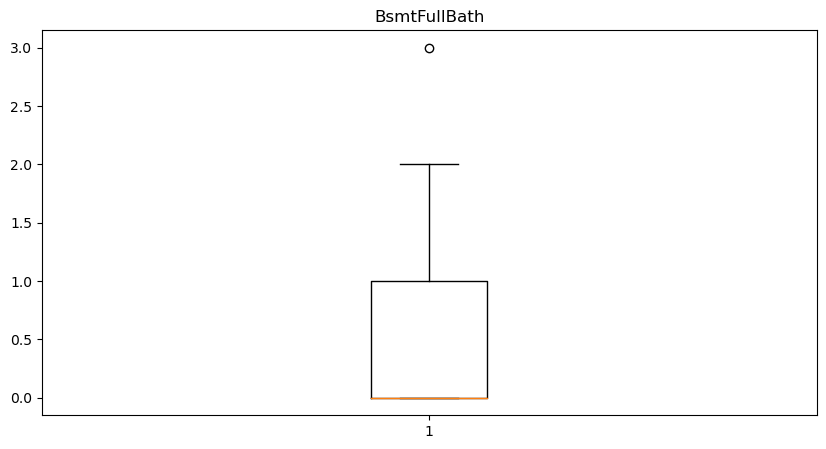

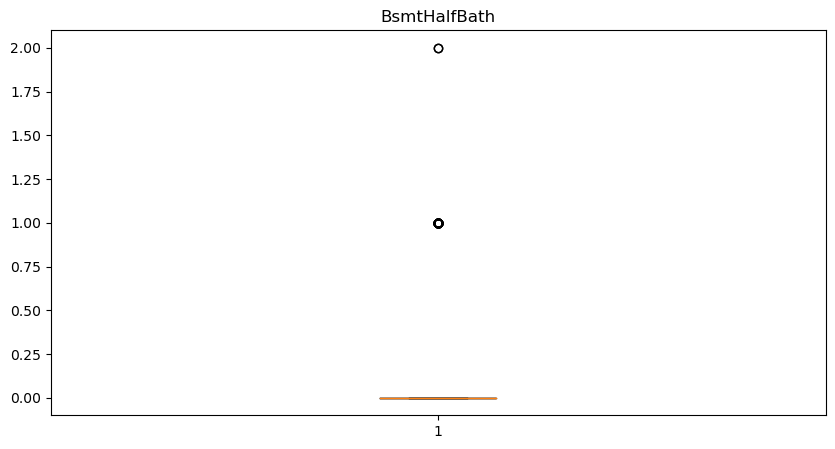

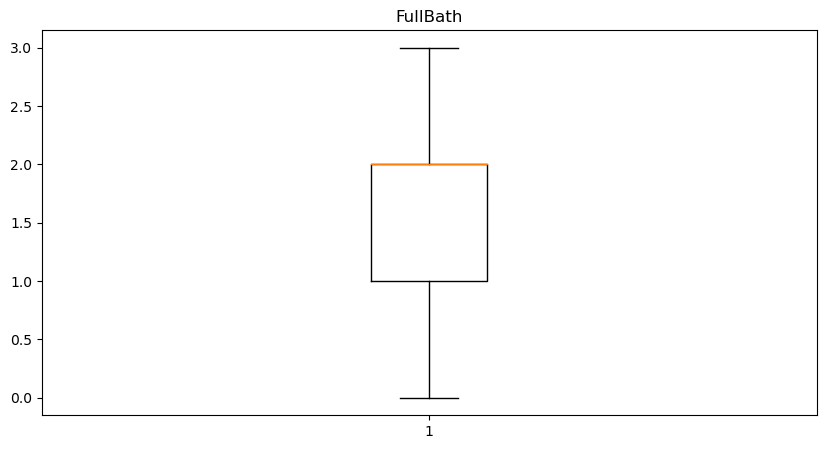

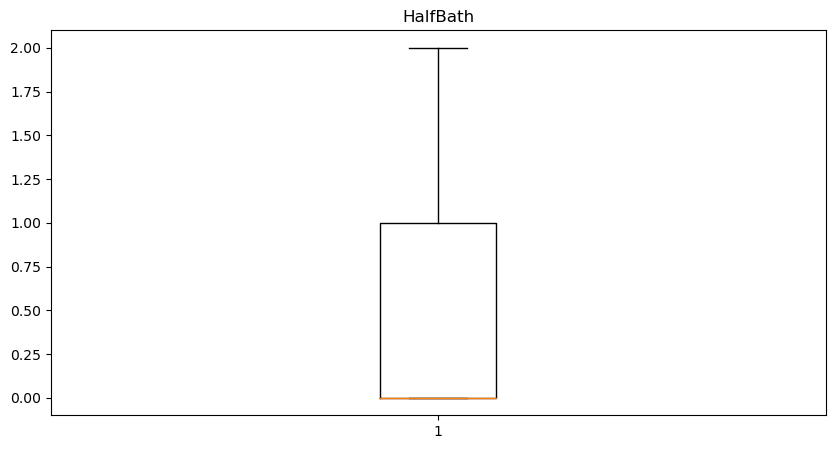

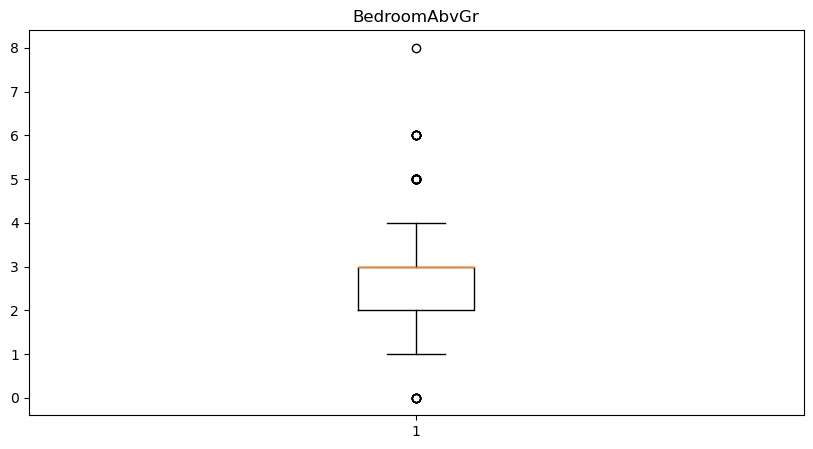

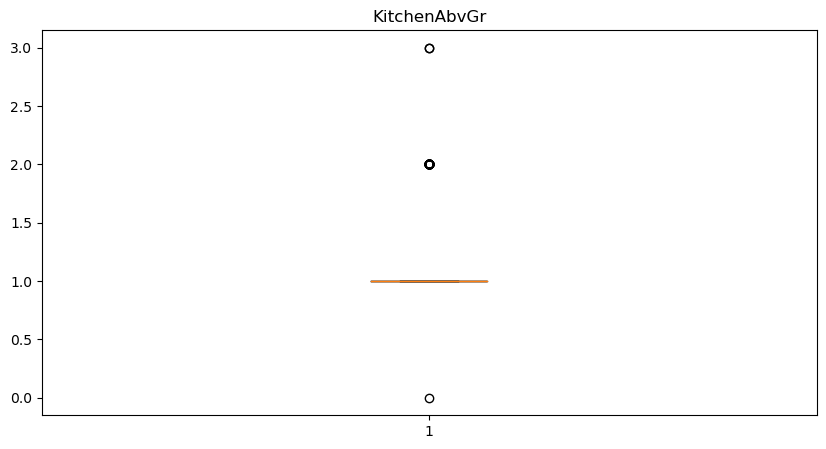

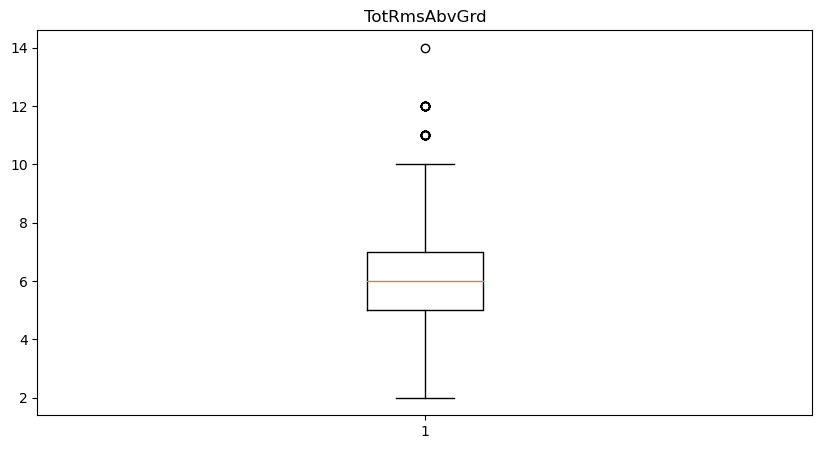

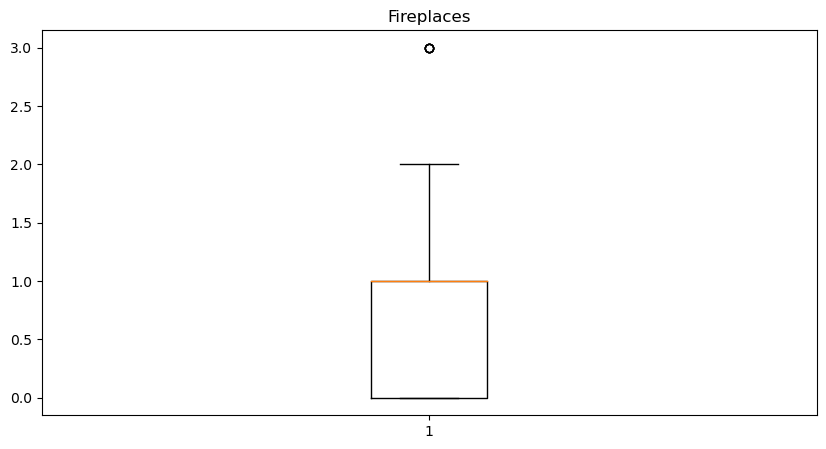

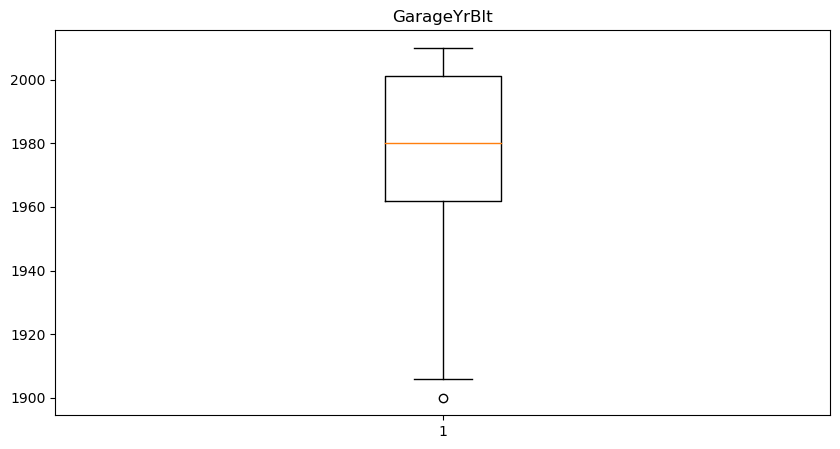

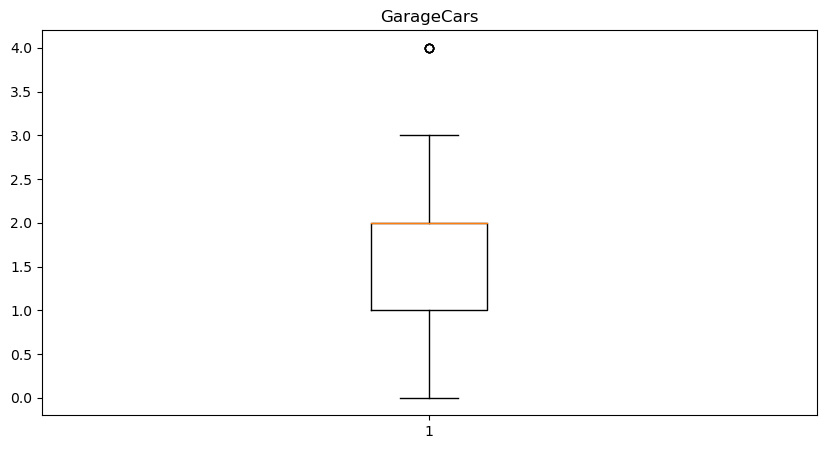

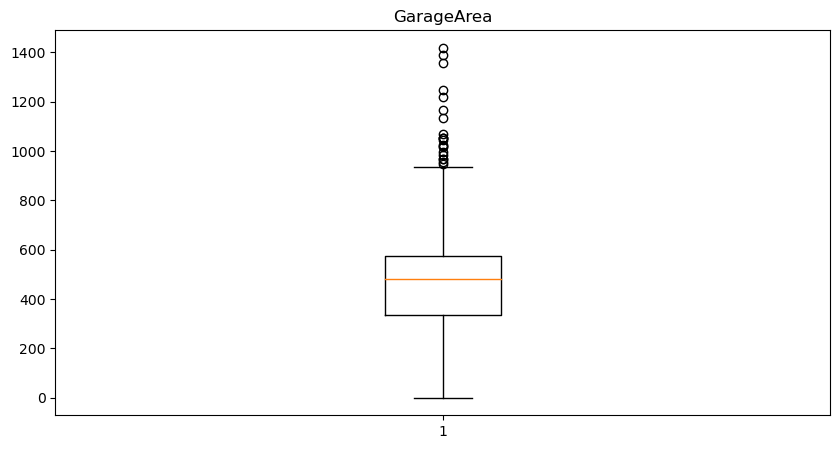

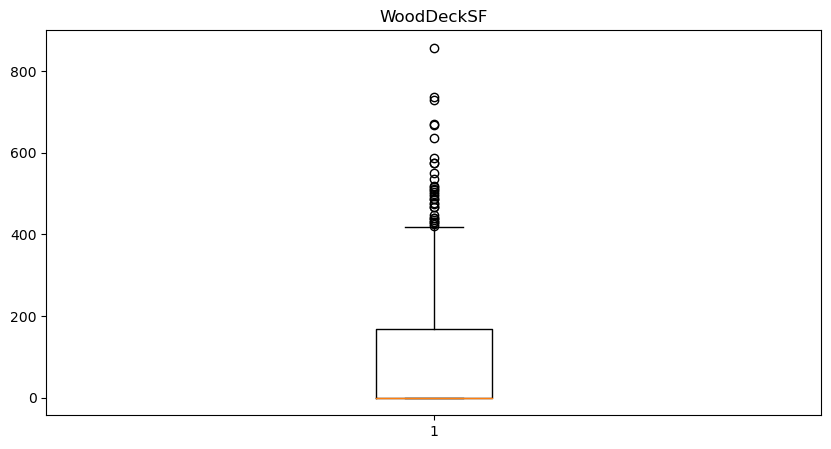

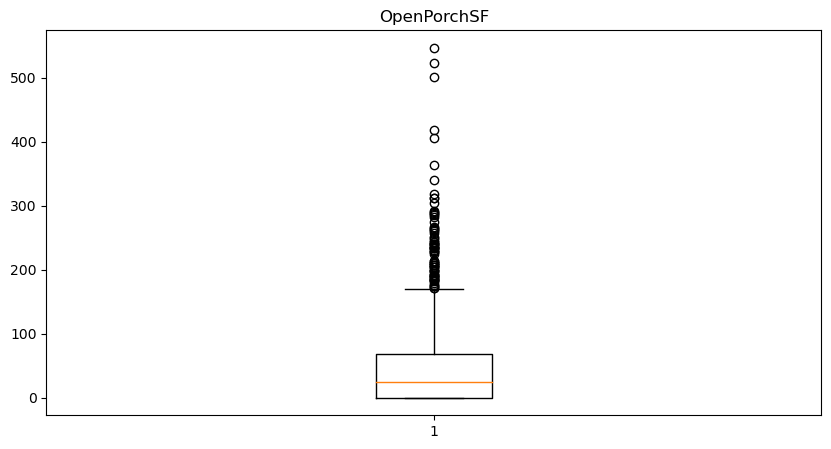

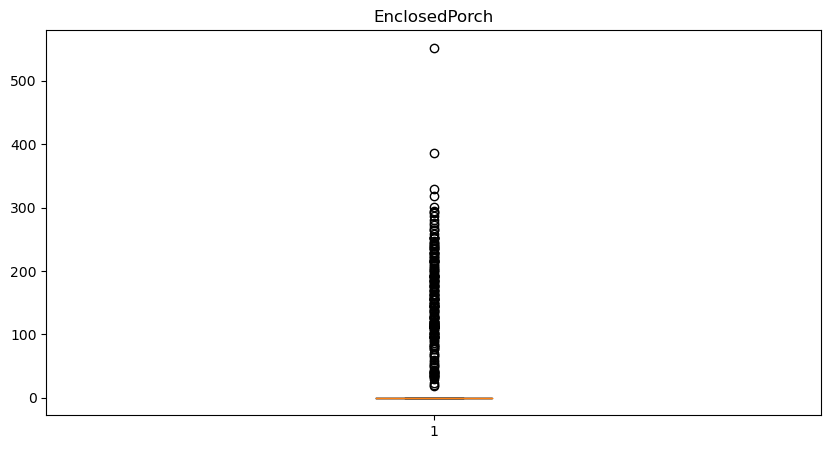

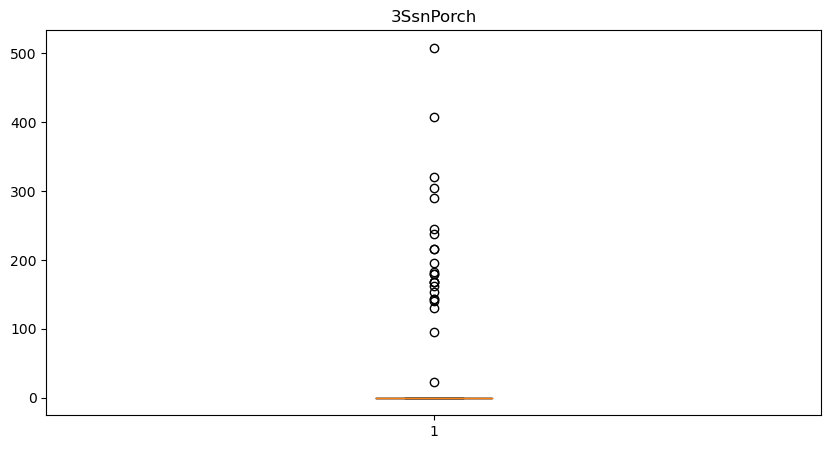

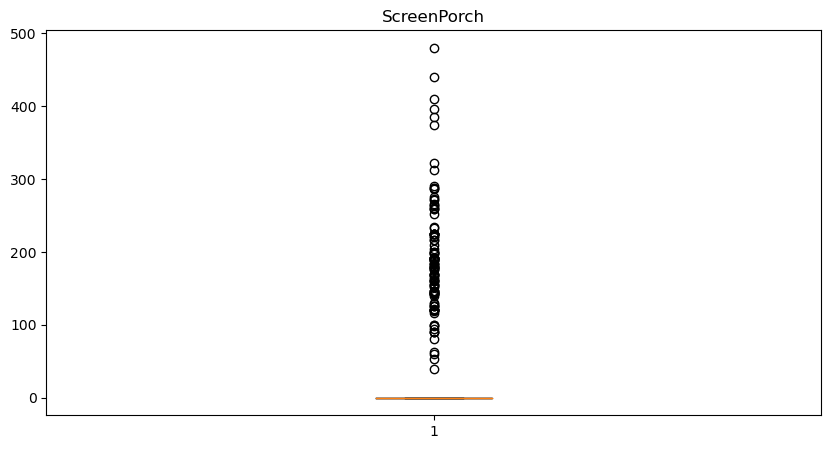

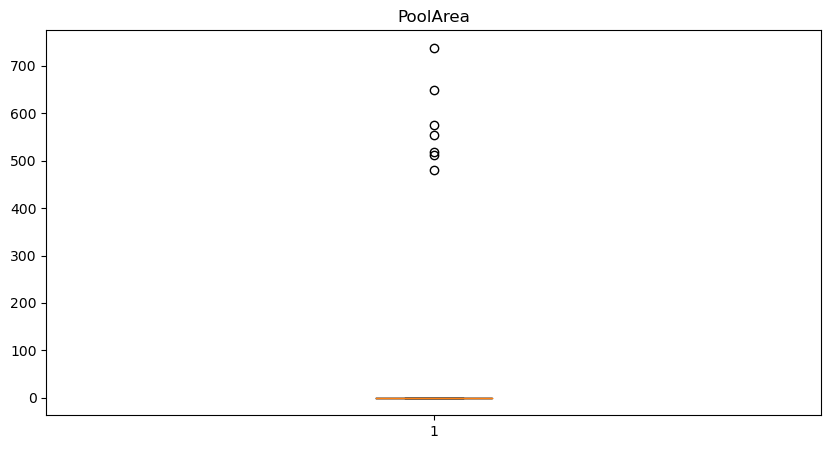

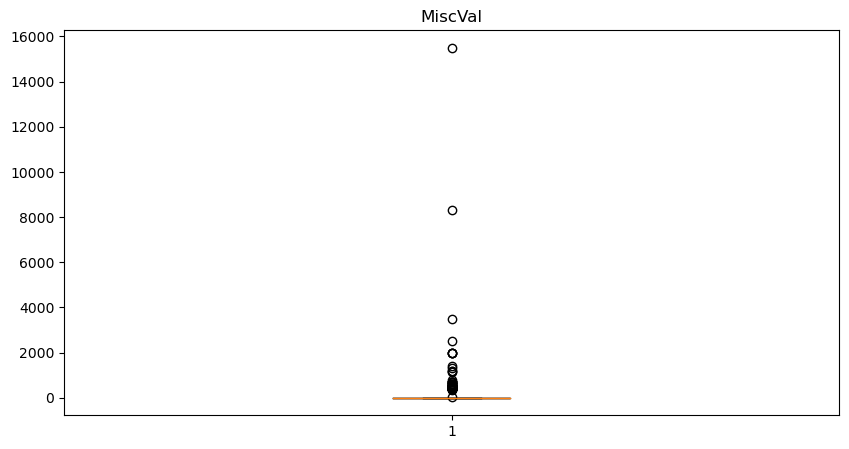

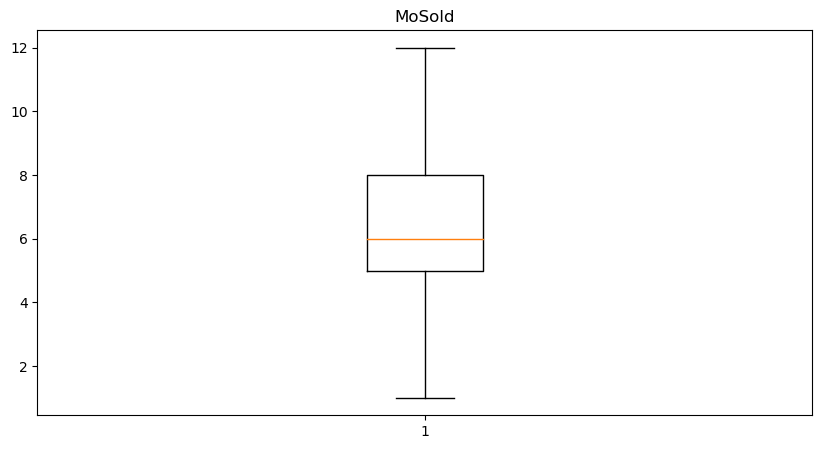

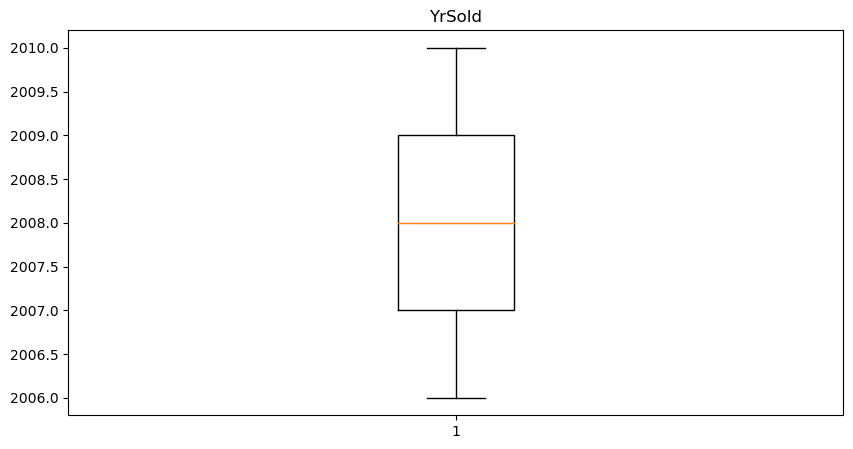

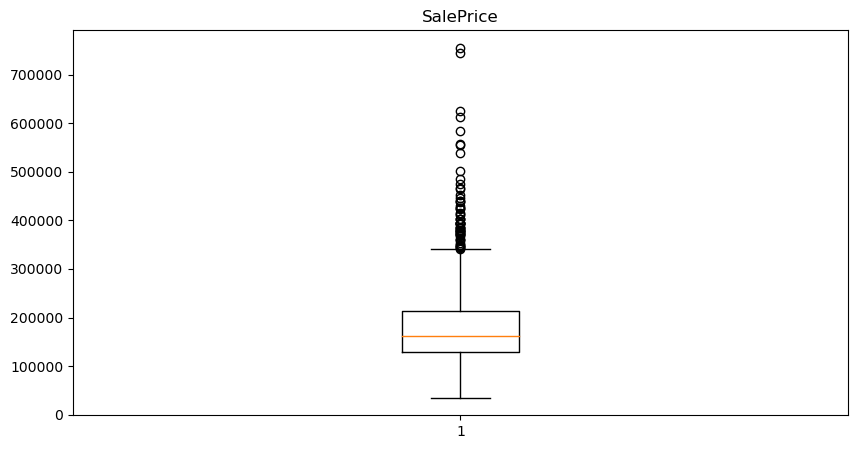

In [14]:
### visuzlizing   outlier

numerical_columns = dataset.columns[dataset.dtypes != 'object']
for col in numerical_columns:
    plt.figure(figsize=(10,5))
    plt.boxplot(dataset[col])
    plt.title(col)
    plt.show()



#### finding the correlation of the numeric values

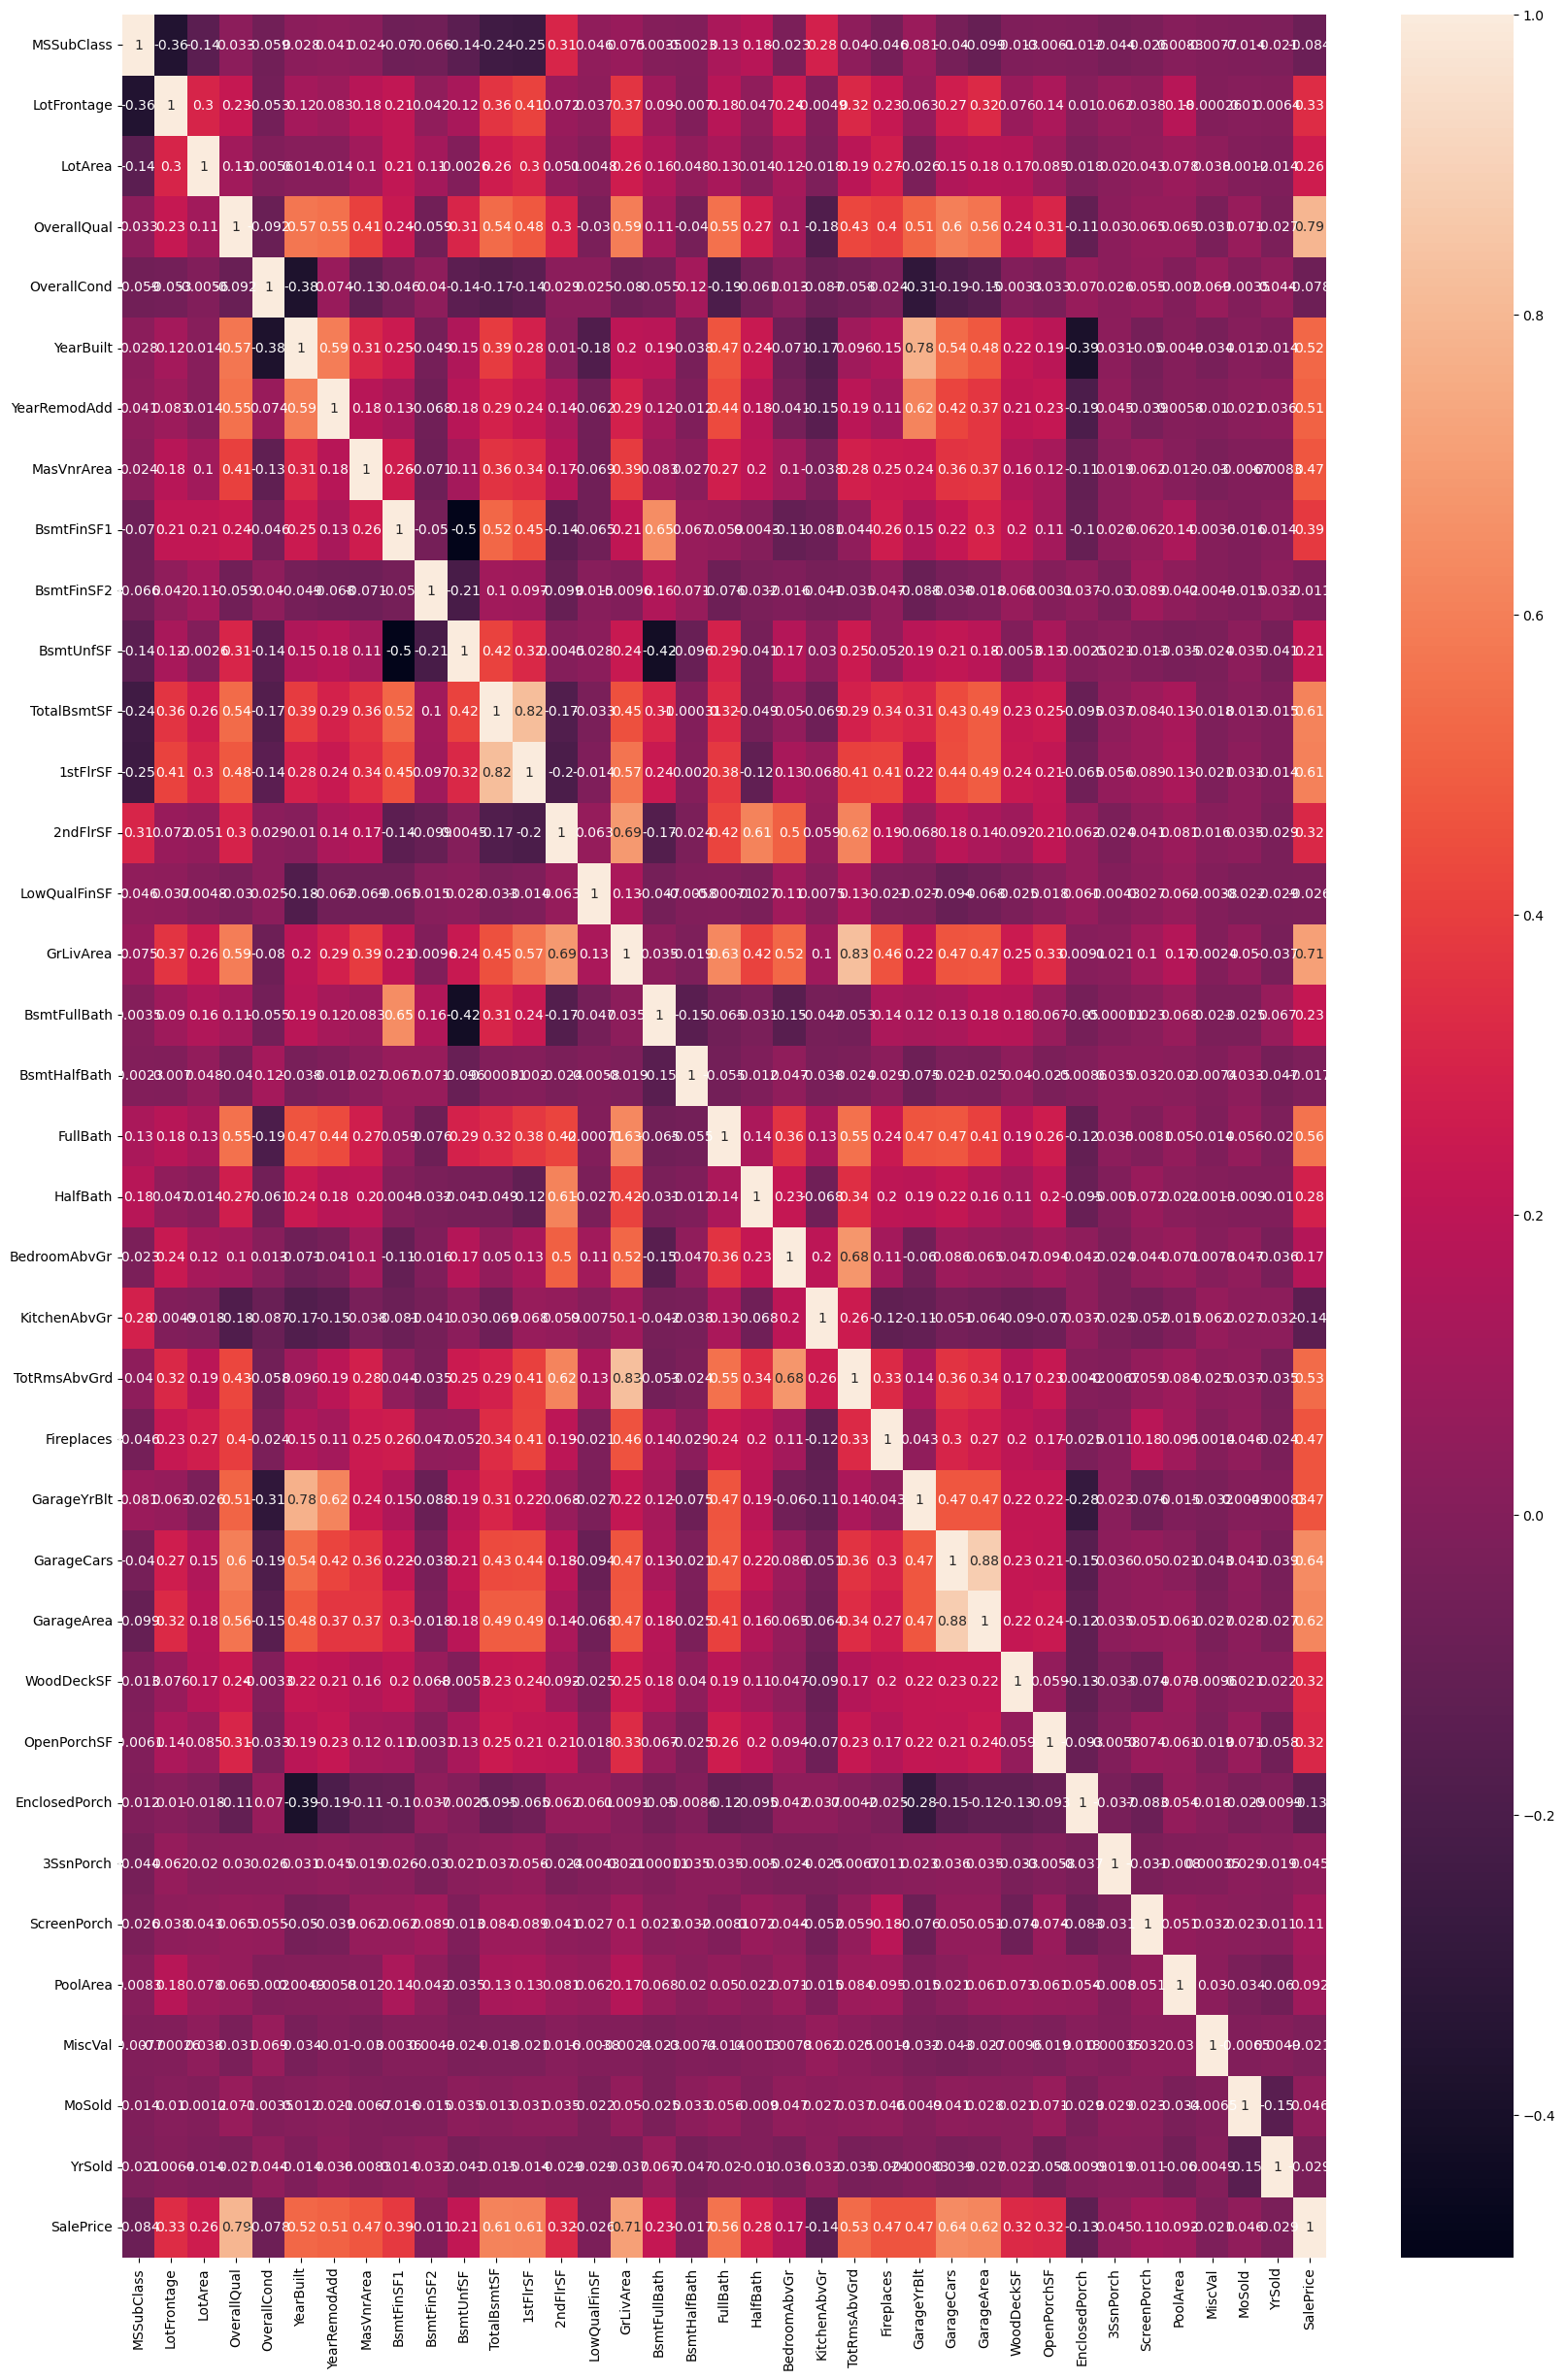

In [15]:
plt.figure(figsize=(20,30))
sns.heatmap(data = dataset.corr(),annot=True)
plt.show()


In [16]:
dataset.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

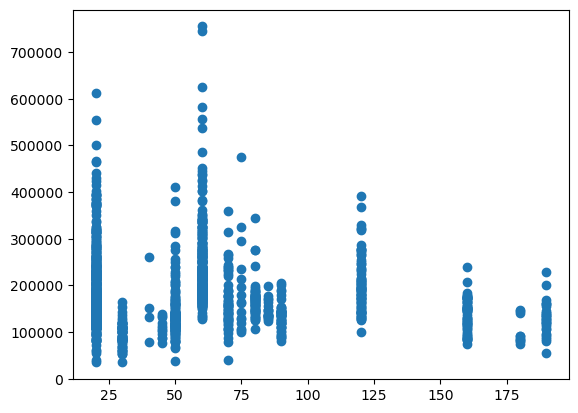

In [17]:
plt.scatter(data=dataset,x="MSSubClass",y="SalePrice")
plt.show()

In [18]:


categorical_columns = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope'
                       
                     ,'Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl'
                    ,'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond'
                   ,'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual'
                   ,'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Neighborhood'
                   ,'SaleType','SaleCondition']



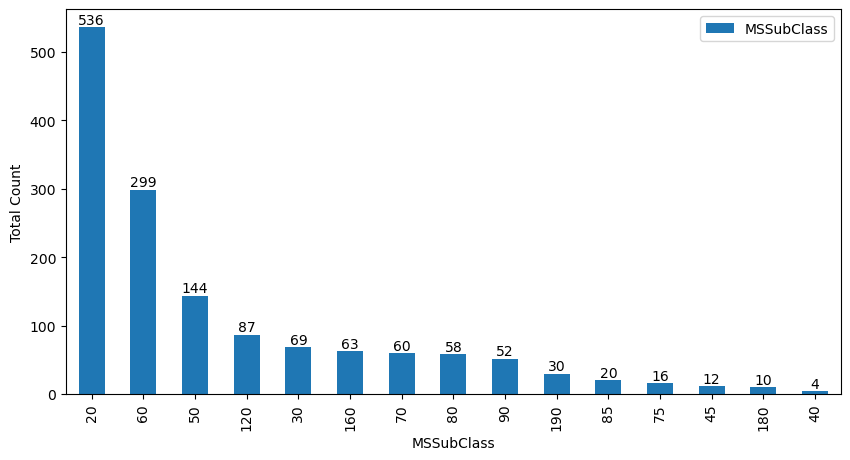

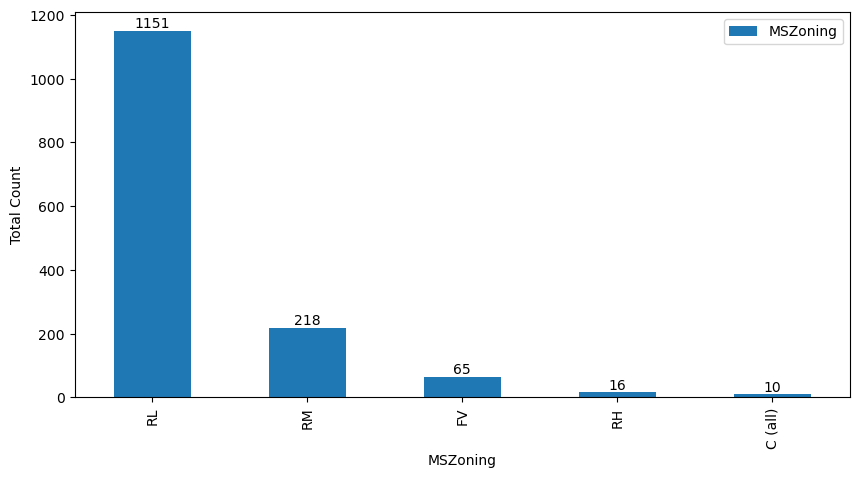

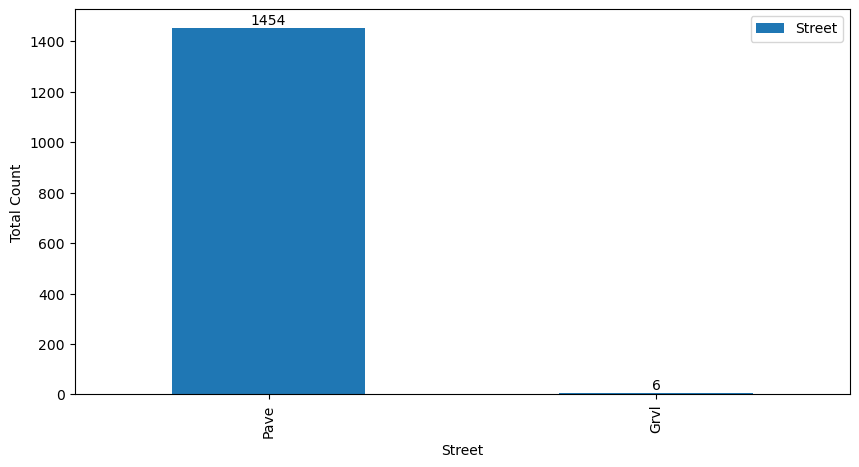

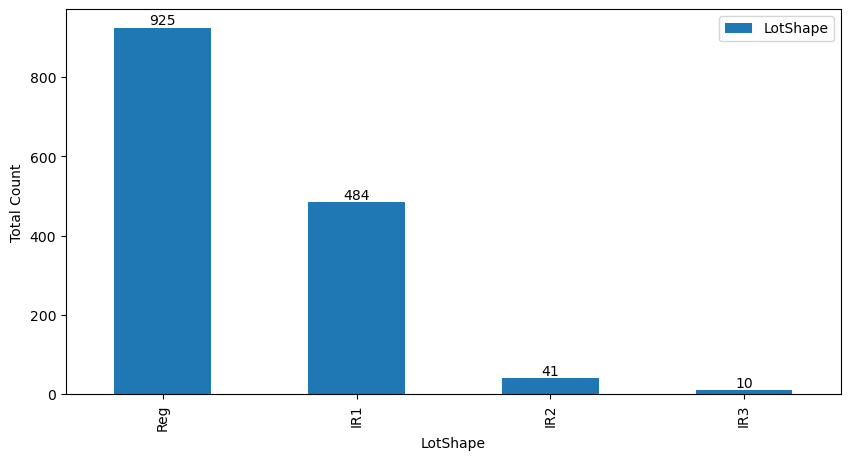

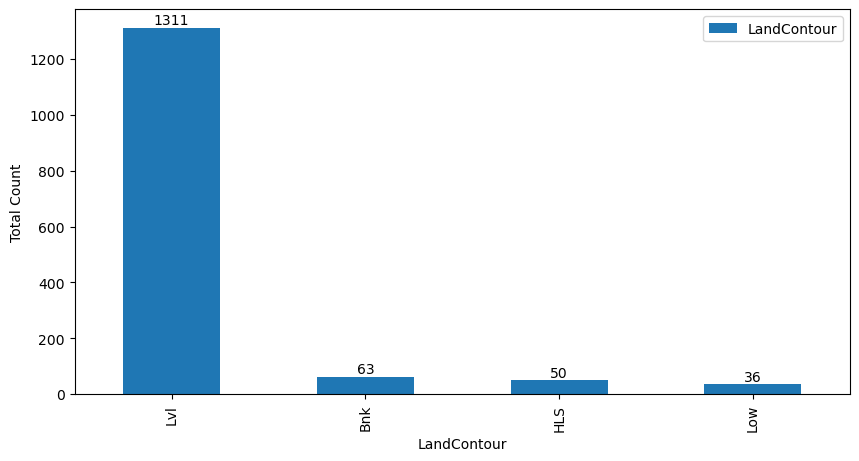

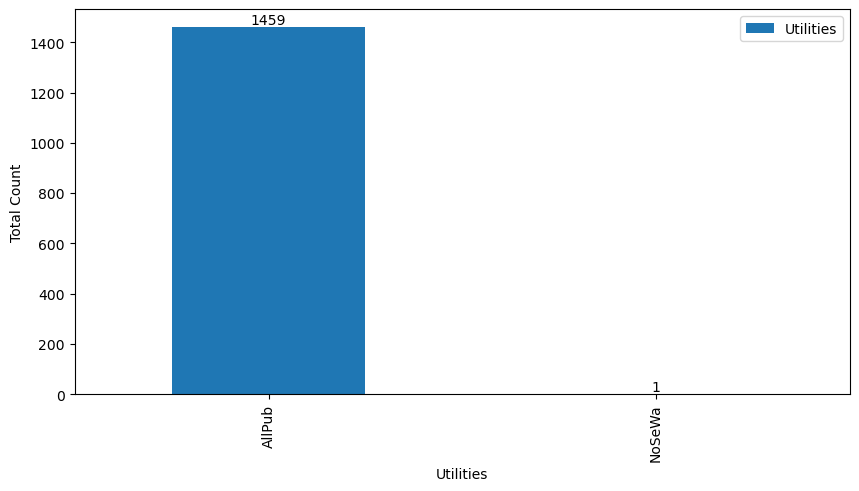

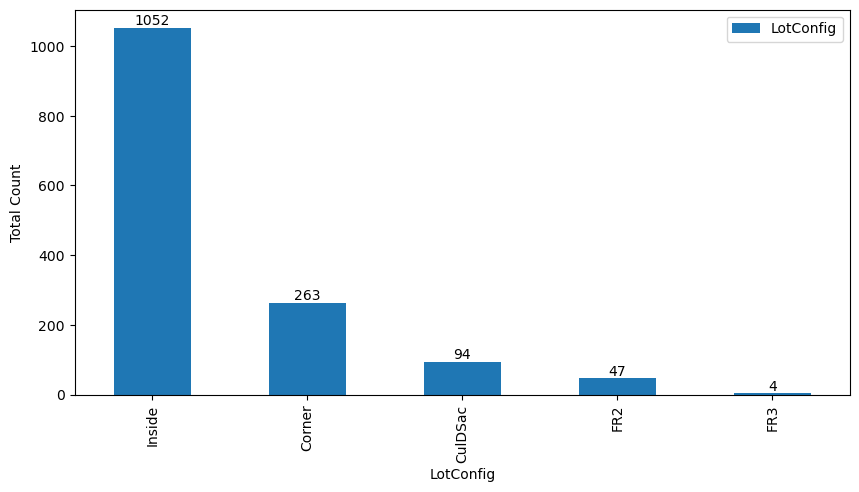

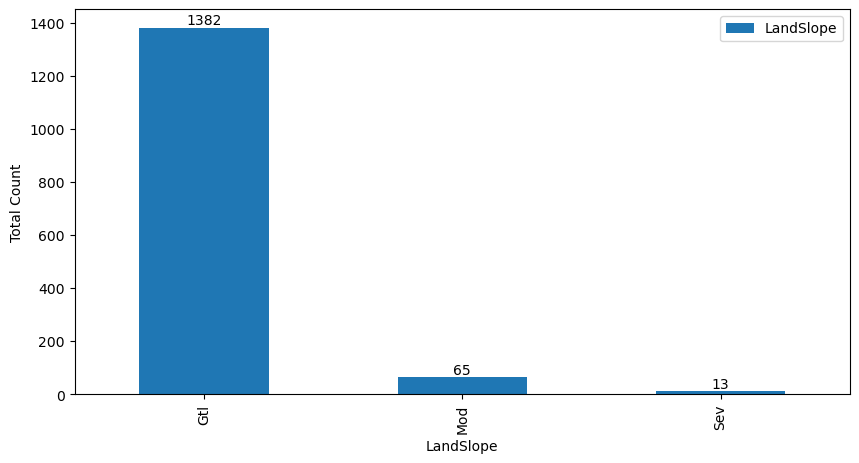

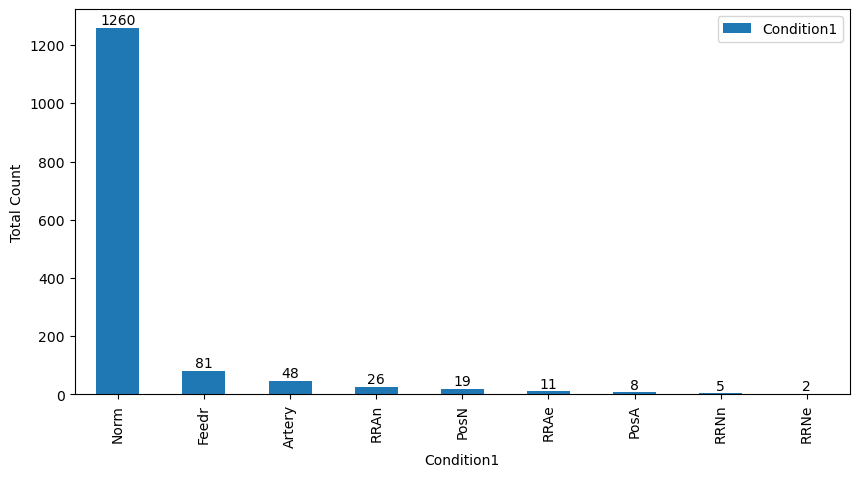

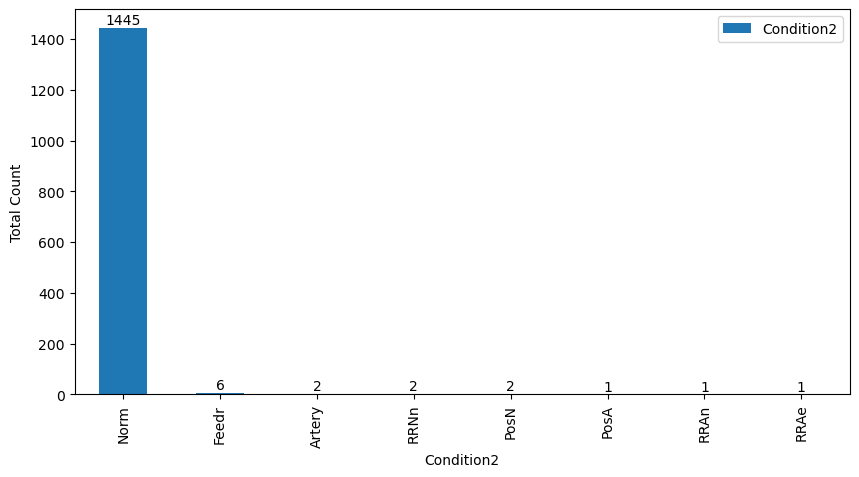

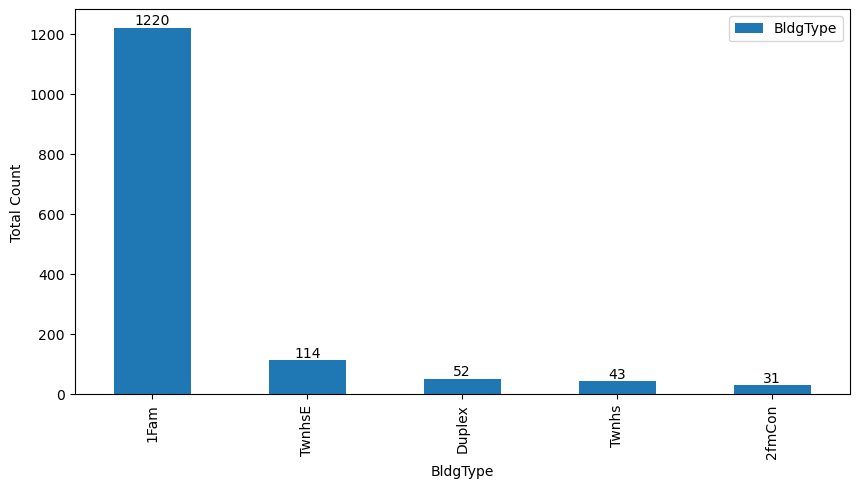

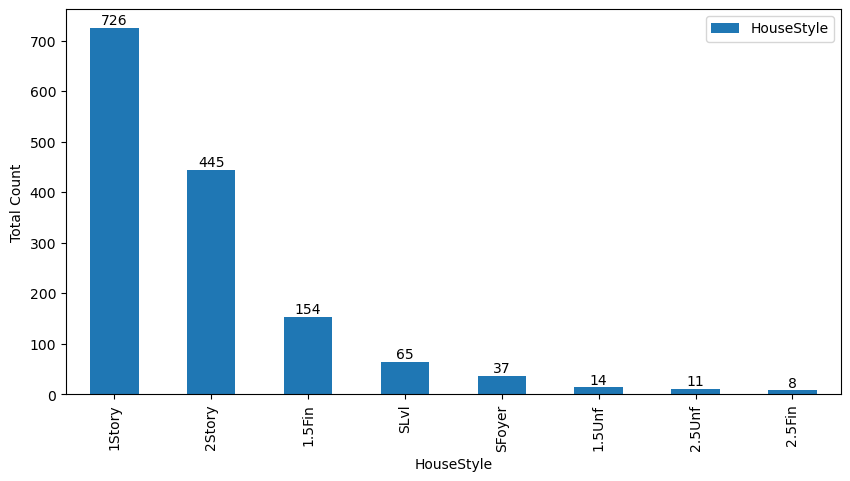

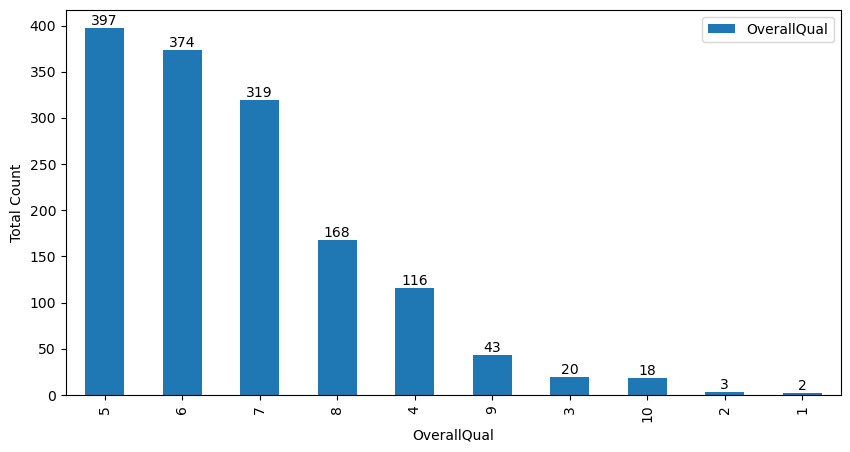

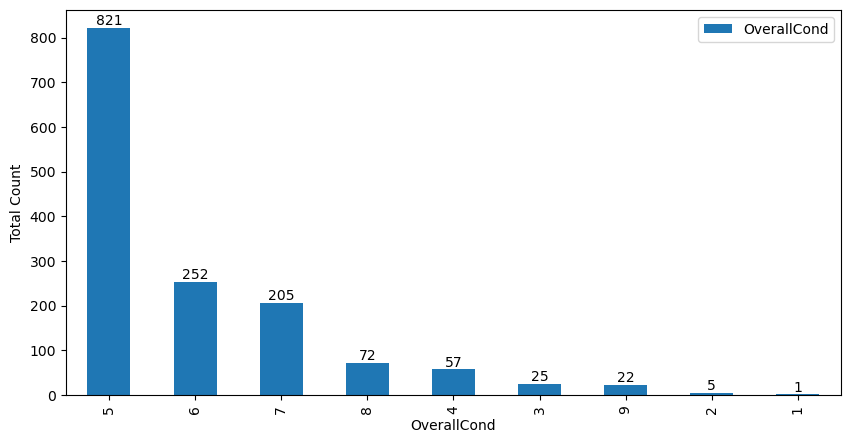

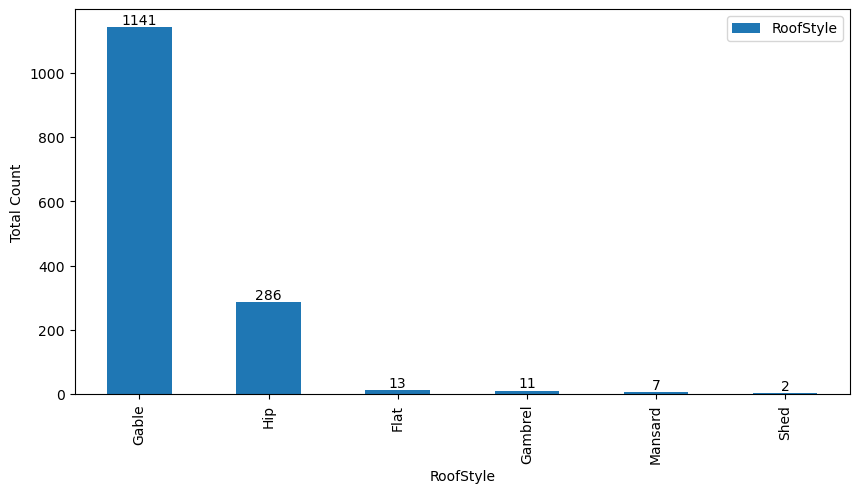

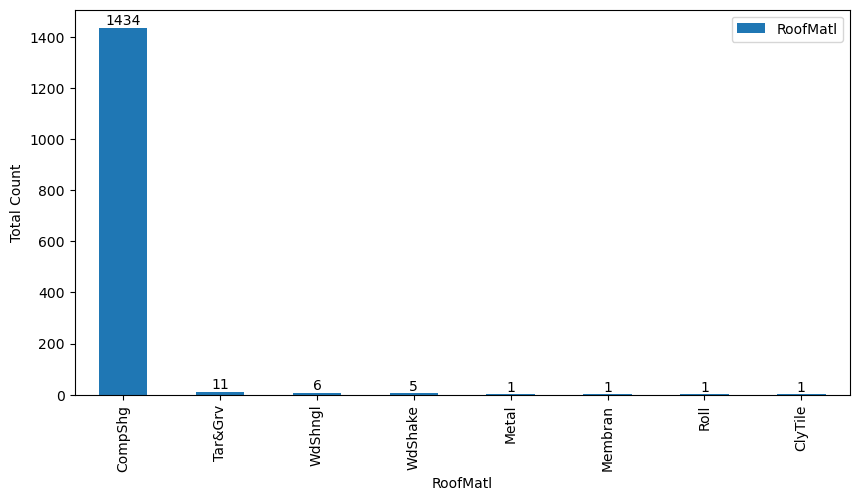

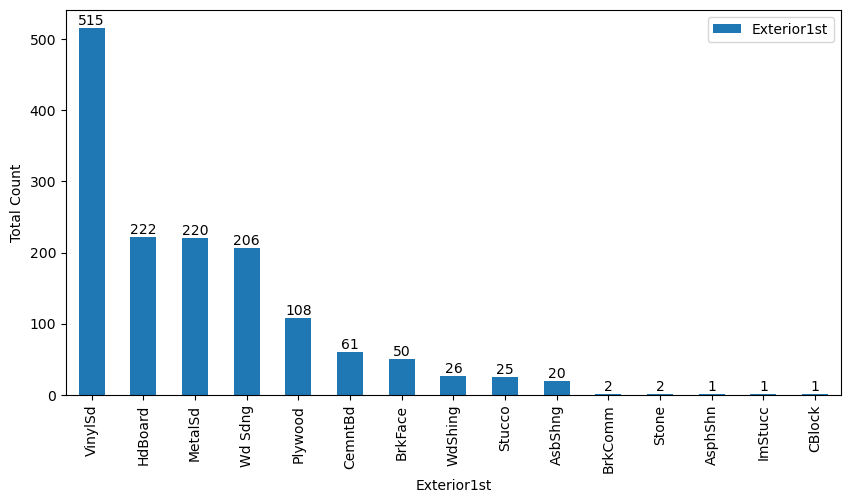

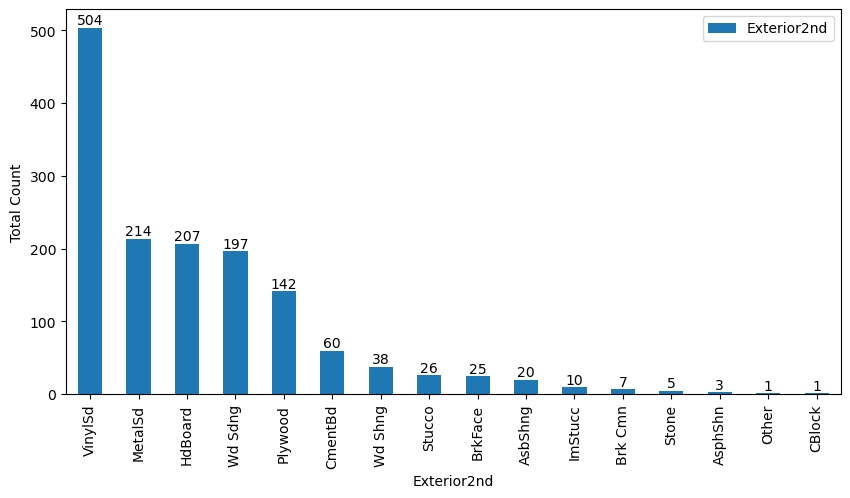

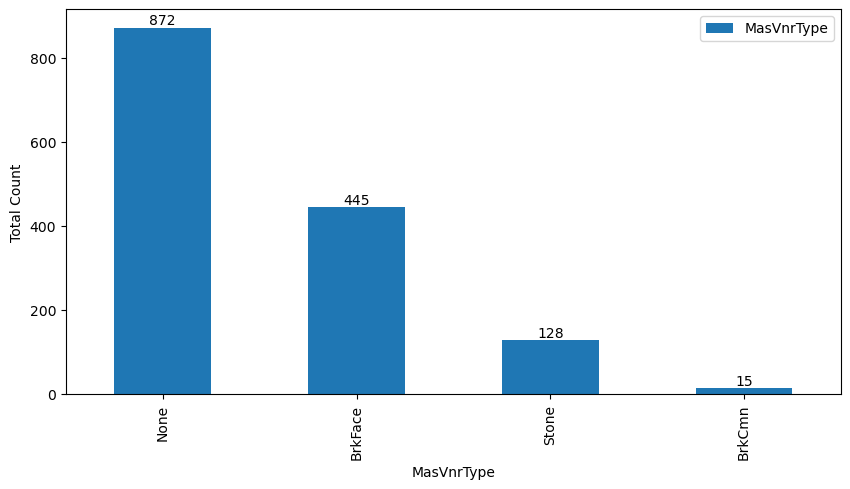

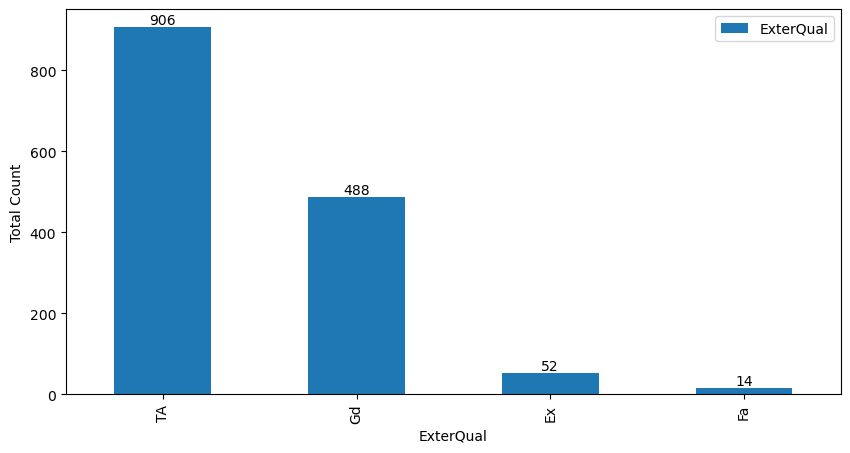

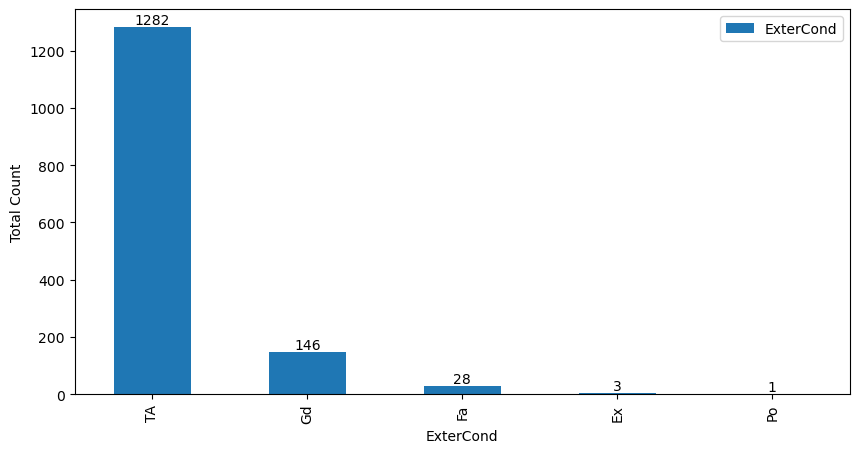

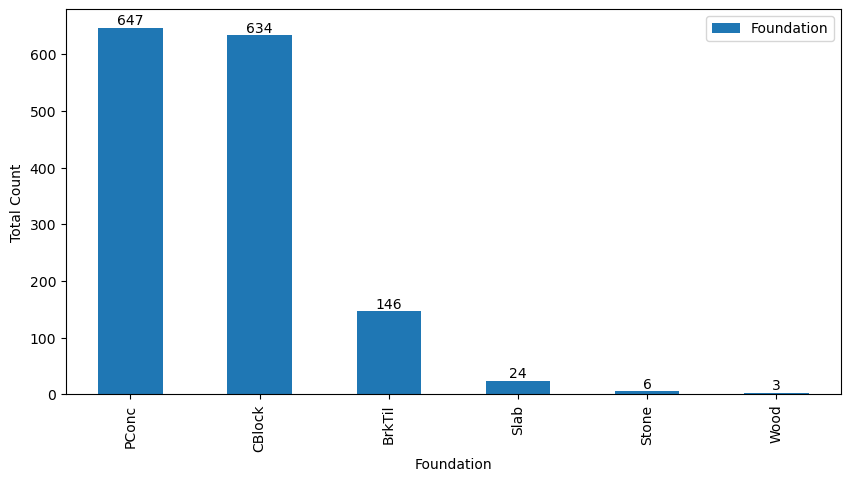

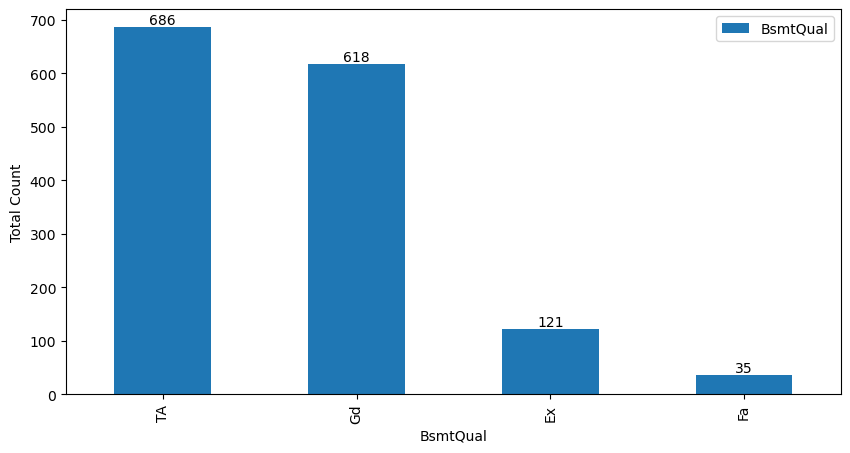

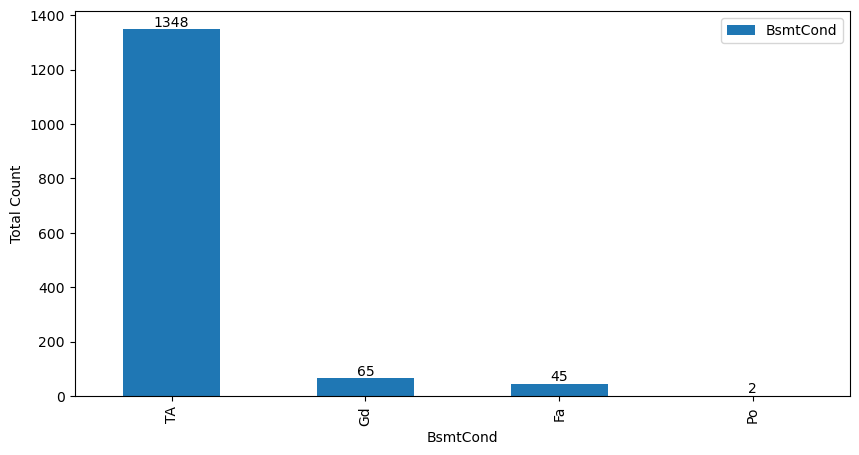

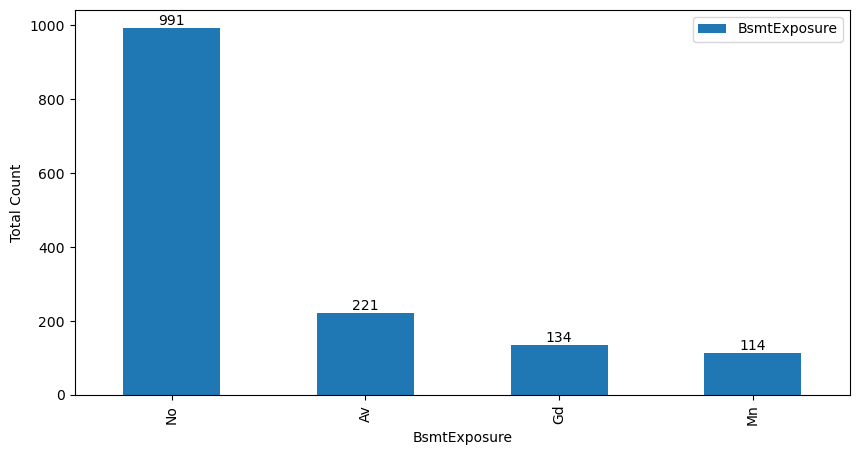

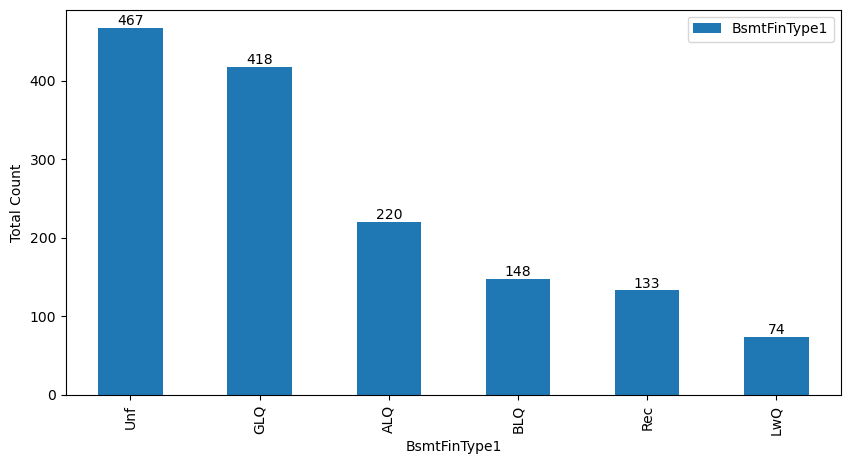

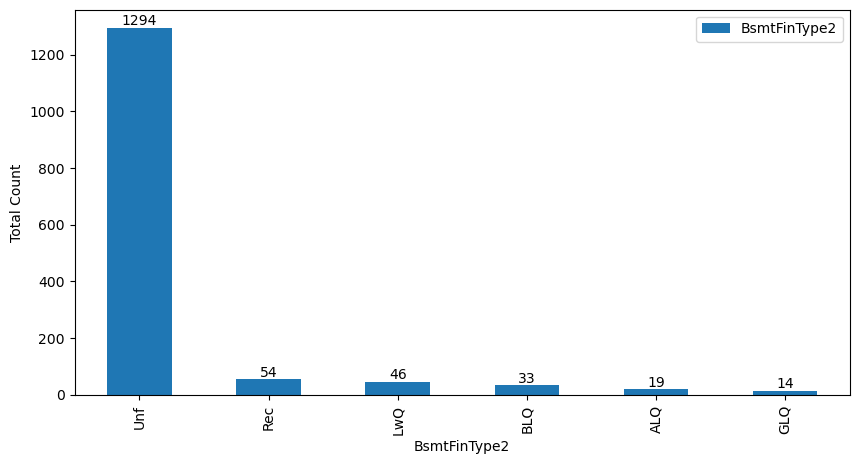

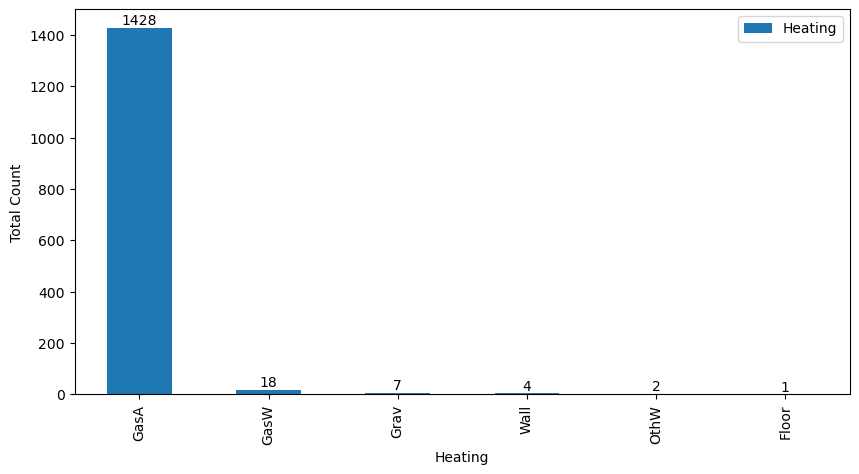

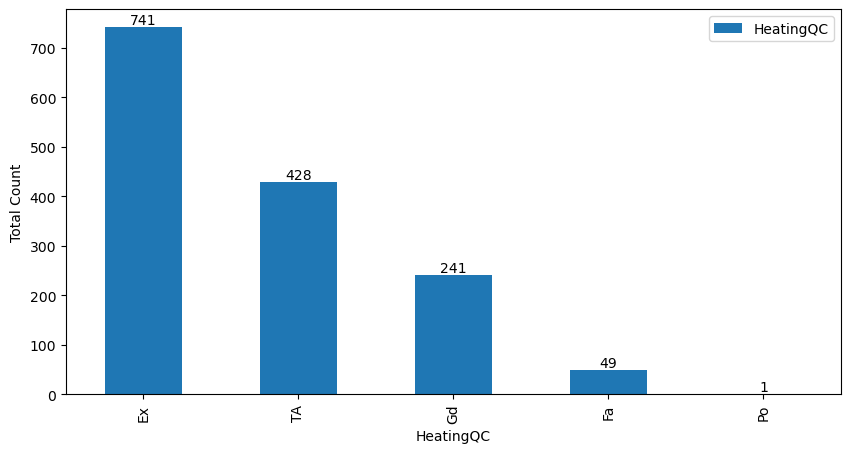

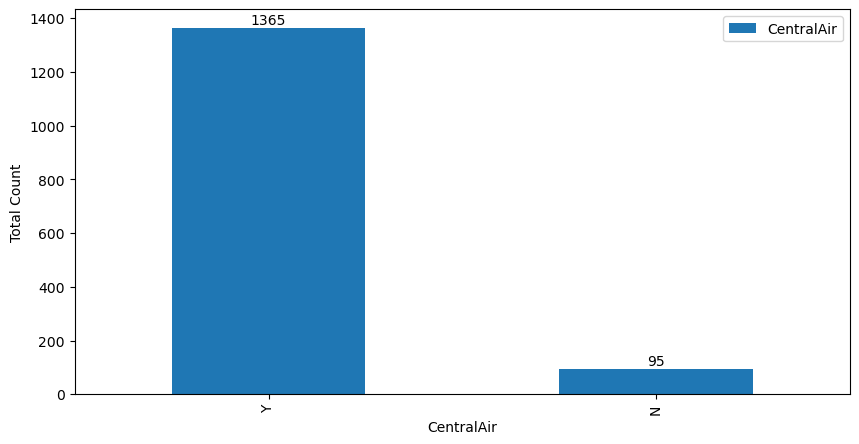

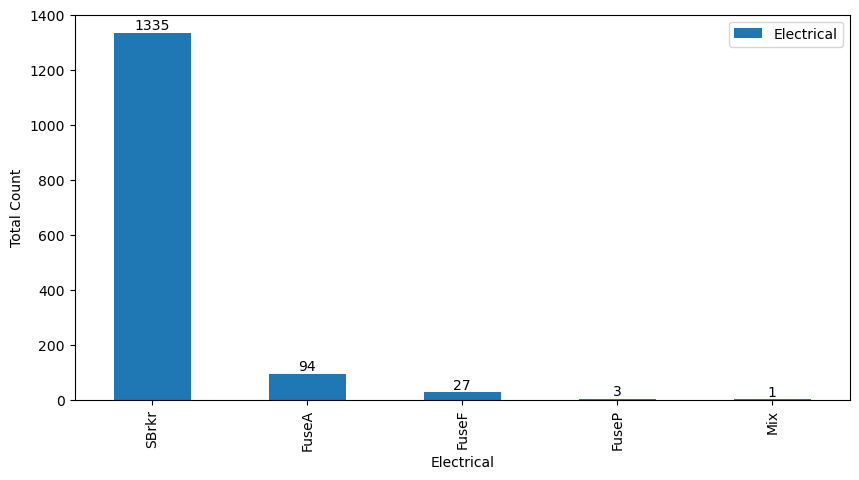

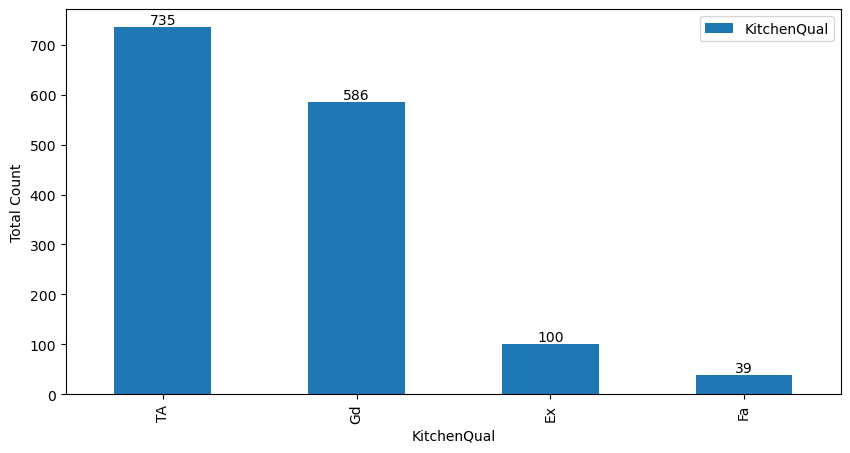

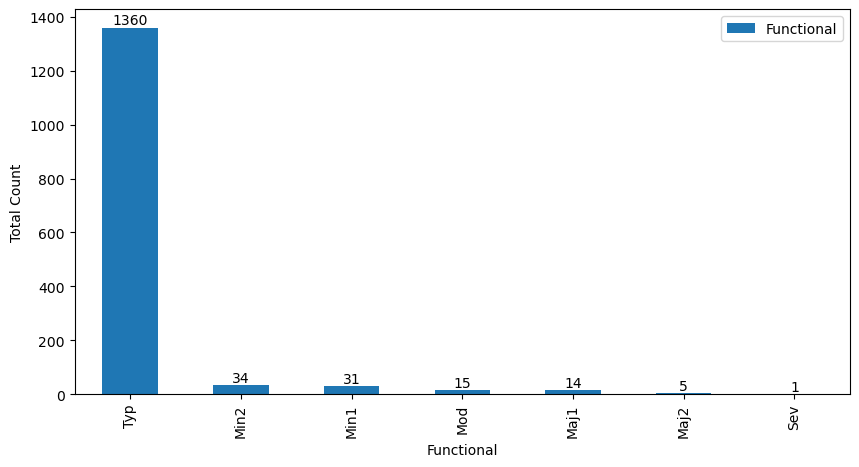

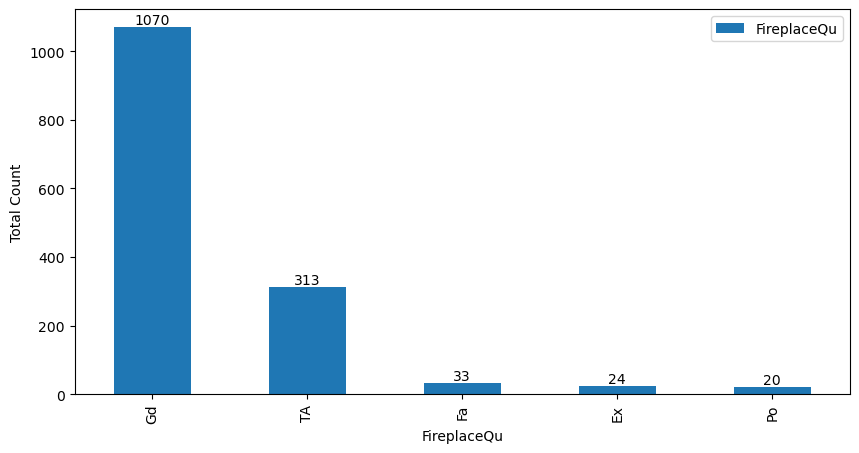

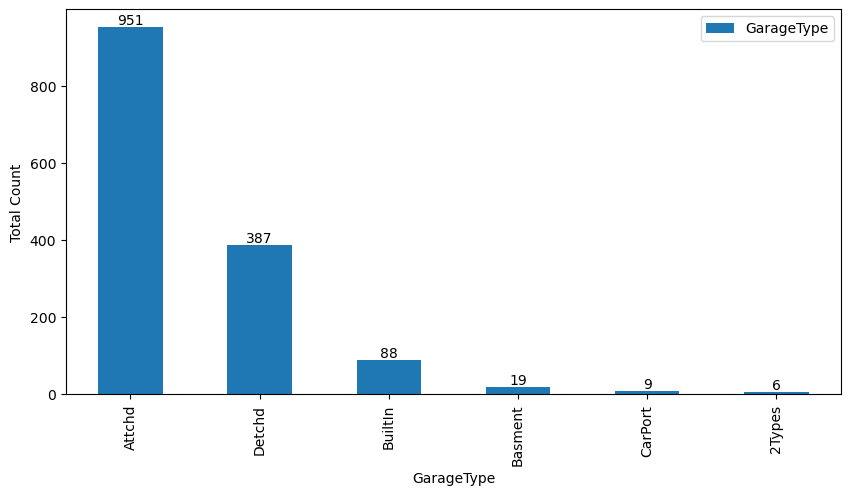

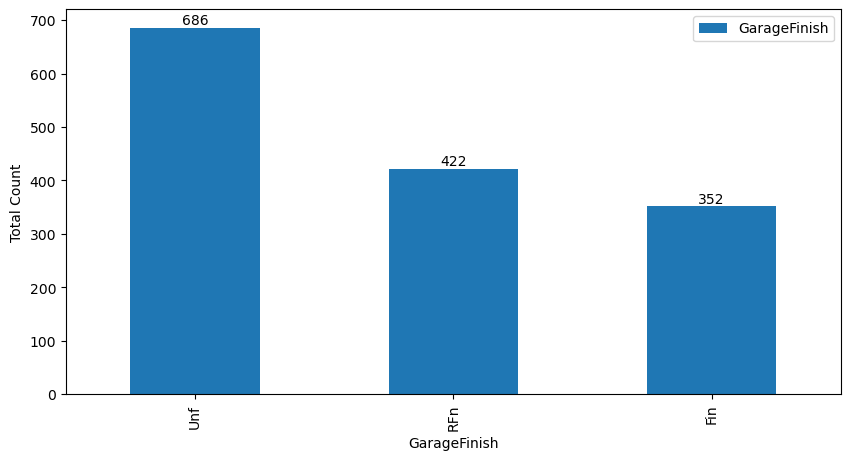

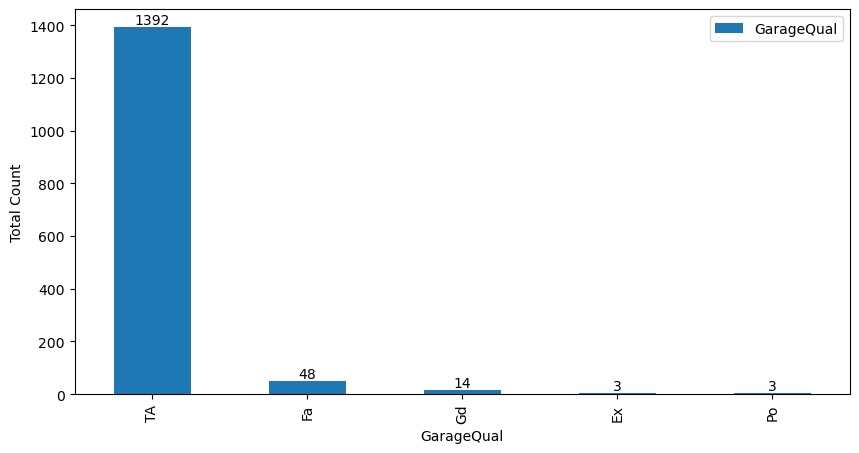

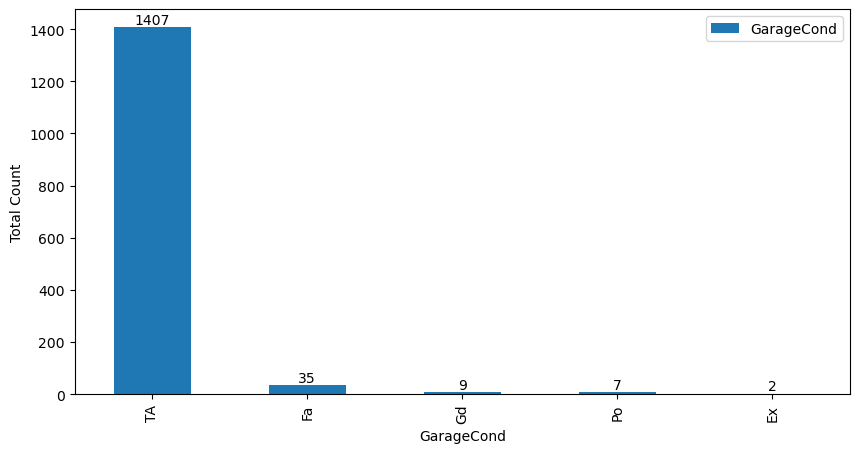

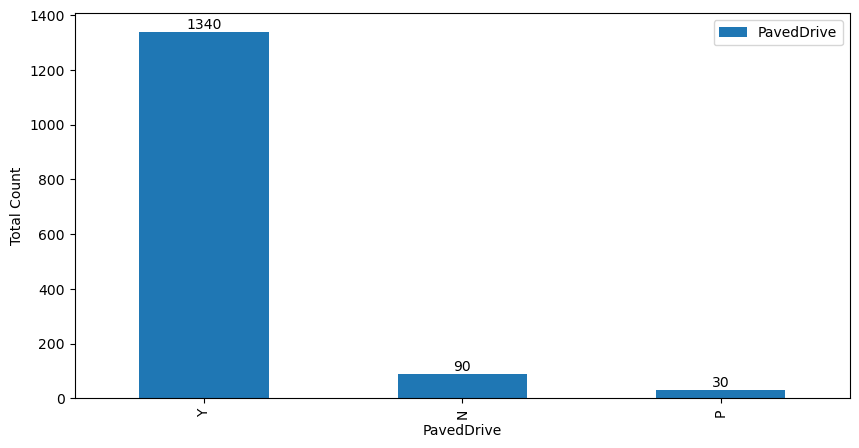

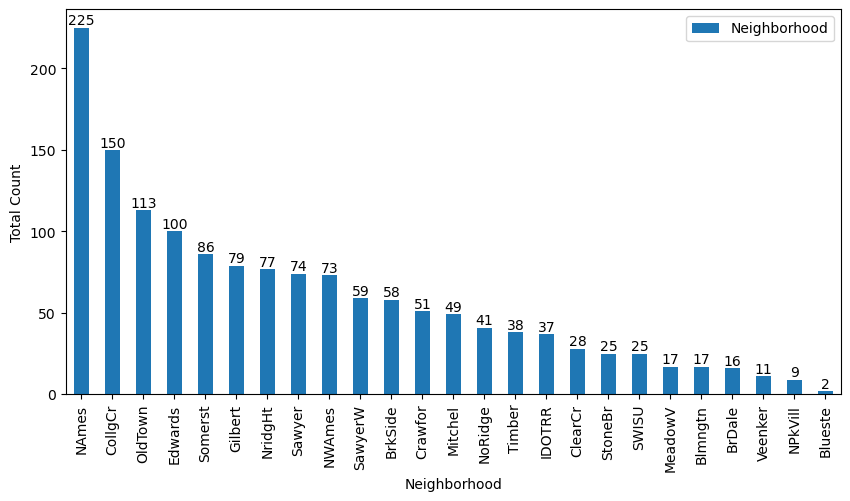

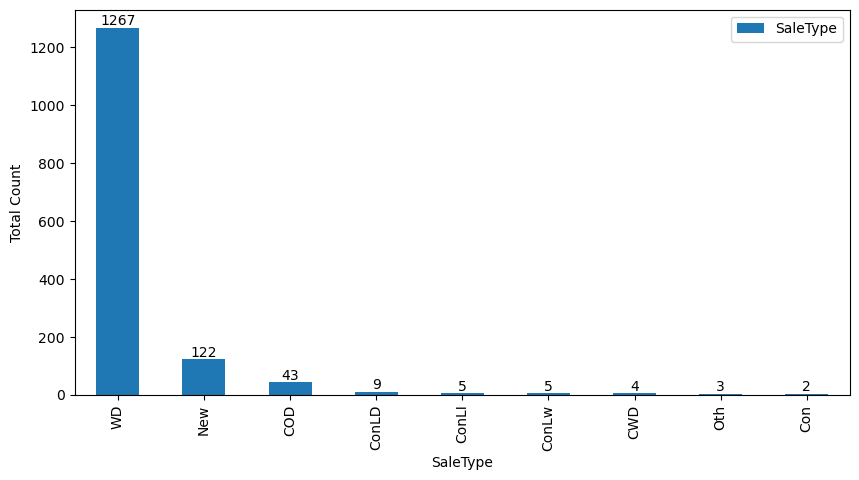

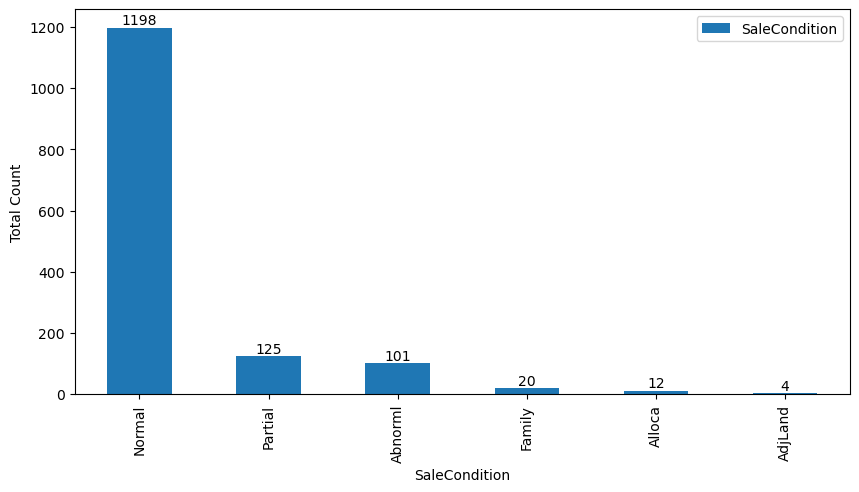

In [19]:
for col in categorical_columns:
    plt.figure(figsize=(10,5))
    data_counts = dataset[col].value_counts()
    ax = data_counts.plot.bar()
    ax.bar_label(ax.containers[0])
    plt.xlabel(col)
    plt.ylabel('Total Count')
    plt.legend()
    plt.show()
    
    

<Figure size 2000x3000 with 0 Axes>

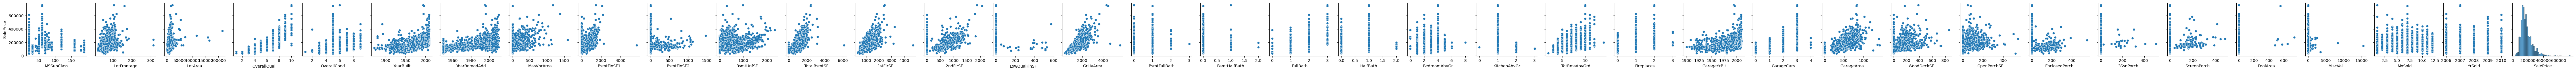

In [20]:
plt.figure(figsize=(20,30))

sns.pairplot(dataset,y_vars='SalePrice')
plt.show()

In [21]:
dummies_column = pd.get_dummies(dataset[categorical_columns],drop_first=True)

In [22]:
dummies_column

,MSSubClass,OverallQual,OverallCond,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,7,5,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,20,6,8,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,60,7,5,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,70,7,5,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,60,8,5,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,20,6,6,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,70,7,9,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,20,5,6,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [23]:
dataset =pd.concat([dataset,dummies_column],axis=1)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [24]:
dataset.drop(categorical_columns,axis=1,inplace=True)
dataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


##  Preparing Model

In [25]:
## split data into train and test
df_train,df_test = train_test_split(dataset,test_size=0.3,random_state=1)
print(df_test.shape,df_train.shape)


(438, 234) (1022, 234)


In [26]:
### Scaling the training dataset to same scale 
scale = StandardScaler()
#scale = MinMaxScaler()
columns = dataset.columns

df_train[columns] = scale.fit_transform(df_train[columns])






In [27]:
df_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,...,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03
mean,7.734626e-17,-6.952473e-18,3.291996e-15,-3.542285e-15,7.647720e-17,-4.171484e-17,6.257226e-17,-7.300097e-17,1.668594e-16,-1.181920e-16,...,8.690591e-18,-3.128613e-17,2.607177e-18,2.433366e-17,1.564306e-16,3.476236e-17,1.042871e-17,-3.476236e-17,6.604849e-17,1.390495e-17
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00
min,-2.136087e+00,-8.966689e-01,-3.310552e+00,-1.726969e+00,-5.787801e-01,-9.738860e-01,-2.775694e-01,-1.285988e+00,-2.367166e+00,-2.134286e+00,...,-6.268391e-02,-5.425922e-02,-2.973078e-01,-4.428074e-02,-2.574270e+00,-4.428074e-02,-8.882312e-02,-1.220481e-01,-2.177515e+00,-3.011894e-01
25%,-4.383093e-01,-2.969731e-01,-5.815870e-01,-8.500417e-01,-5.787801e-01,-9.738860e-01,-2.775694e-01,-7.768006e-01,-5.766389e-01,-7.215441e-01,...,-6.268391e-02,-5.425922e-02,-2.973078e-01,-4.428074e-02,3.884597e-01,-4.428074e-02,-8.882312e-02,-1.220481e-01,4.592390e-01,-3.011894e-01
50%,-4.651446e-02,-1.082536e-01,5.073419e-02,4.166310e-01,-5.787801e-01,-1.155908e-01,-2.775694e-01,-1.912072e-01,-1.486756e-01,-1.936785e-01,...,-6.268391e-02,-5.425922e-02,-2.973078e-01,-4.428074e-02,3.884597e-01,-4.428074e-02,-8.882312e-02,-1.220481e-01,4.592390e-01,-3.011894e-01
75%,3.888131e-01,9.445570e-02,9.825760e-01,9.038129e-01,3.796008e-01,5.710454e-01,-2.775694e-01,5.603139e-01,5.387438e-01,6.185206e-01,...,-6.268391e-02,-5.425922e-02,-2.973078e-01,-4.428074e-02,3.884597e-01,-4.428074e-02,-8.882312e-02,-1.220481e-01,4.592390e-01,-3.011894e-01
max,1.057548e+01,1.960376e+01,1.282097e+00,1.196122e+00,8.672558e+00,1.121283e+01,8.665800e+00,4.041944e+00,1.126963e+01,8.978943e+00,...,1.595306e+01,1.843005e+01,3.363518e+00,2.258318e+01,3.884597e-01,2.258318e+01,1.125833e+01,8.193493e+00,4.592390e-01,3.320170e+00


In [28]:
y_train = df_train.pop('SalePrice')
x_train = df_train


In [29]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [30]:
y_train_pred = lm.predict(x_train)

In [31]:
error_term = y_train - y_train_pred

In [32]:
#### Analysing the error term

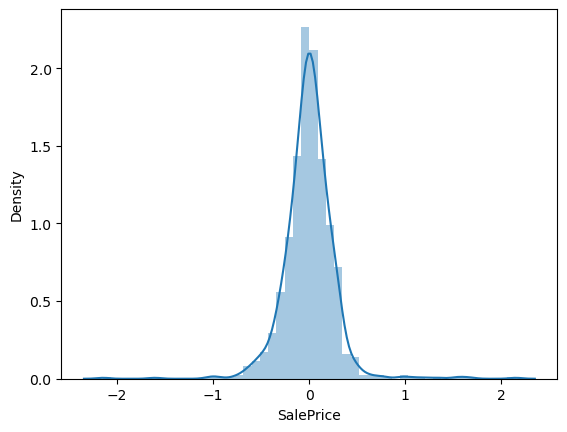

In [33]:
sns.distplot(error_term) ## error terms are normally distributed
plt.show()

In [34]:
### checkingh for no pattern and constant variation other stuff for eeror term

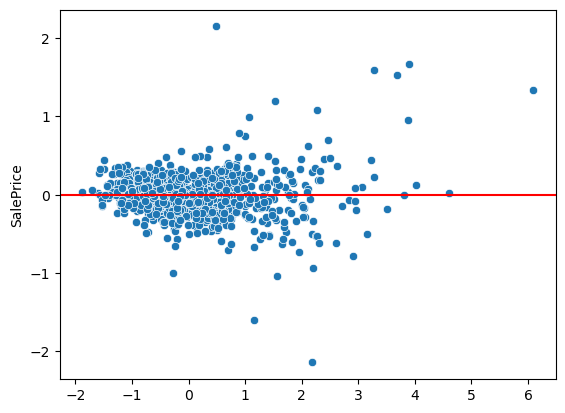

In [35]:
sns.scatterplot(x=y_train_pred,y=error_term)
plt.axhline(color='red')
plt.show()

In [36]:
### we are good with the training data set now checking the training r2_score and mse
r2_score_train_linearRegression = r2_score(y_pred=y_train_pred,y_true= y_train)
print(r2_score_train_linearRegression)
mse_train_linearRegression = mean_squared_error(y_pred=y_train_pred,y_true= y_train)
print(mse_train_linearRegression)

rmse_train_linearRegression =(mse_train_linearRegression)**0.5 
print(rmse_train_linearRegression)




0.9285129694819981
0.07148703051800184
0.267370586486251


### our training model looks good let see how our model behaves on the test data

In [37]:
columns = dataset.columns

df_test[columns] = scale.transform(df_test[columns])




In [38]:
df_test.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,-0.029718,-0.045010,-0.023044,-0.094576,0.058174,-0.053215,0.016215,0.025900,-0.023695,-0.070751,...,-0.026118,0.030144,0.028656,0.007380,-0.010629,0.059041,0.014804,-0.027122,-0.046440,0.029528
std,0.854836,0.844919,1.016924,1.016174,1.142321,0.947330,0.927198,1.025603,0.928309,0.950014,...,0.765262,1.247624,1.043807,1.081182,1.012651,1.527272,1.080647,0.884386,1.039281,1.044396
min,-2.136087,-0.868306,-3.044312,-1.726969,-0.578780,-0.973886,-0.277569,-1.285988,-2.367166,-1.761975,...,-0.062684,-0.054259,-0.297308,-0.044281,-2.574270,-0.044281,-0.088823,-0.122048,-2.177515,-0.301189
25%,-0.438309,-0.301141,-0.581587,-0.996196,-0.578780,-0.973886,-0.277569,-0.776230,-0.626298,-0.779558,...,-0.062684,-0.054259,-0.297308,-0.044281,0.388460,-0.044281,-0.088823,-0.122048,0.459239,-0.301189
50%,-0.046514,-0.135611,0.017454,0.294836,-0.578780,-0.205199,-0.277569,-0.202611,-0.191081,-0.291856,...,-0.062684,-0.054259,-0.297308,-0.044281,0.388460,-0.044281,-0.088823,-0.122048,0.459239,-0.301189
75%,0.345280,0.077328,0.949296,0.855095,0.355027,0.523542,-0.277569,0.543208,0.470113,0.455953,...,-0.062684,-0.054259,-0.297308,-0.044281,0.388460,-0.044281,-0.088823,-0.122048,0.459239,-0.301189
max,4.524425,14.756651,1.248816,1.196122,7.388935,3.551867,6.159957,3.371391,4.774855,5.245633,...,15.953056,18.430048,3.363518,22.583180,0.388460,22.583180,11.258330,8.193493,0.459239,3.320170


In [39]:
y_test = df_test.pop("SalePrice")
x_test = df_test

In [40]:
y_test_pred = lm.predict(x_test)

In [41]:
error_term = y_test_pred - y_test

In [42]:
#### analyzing the error term 

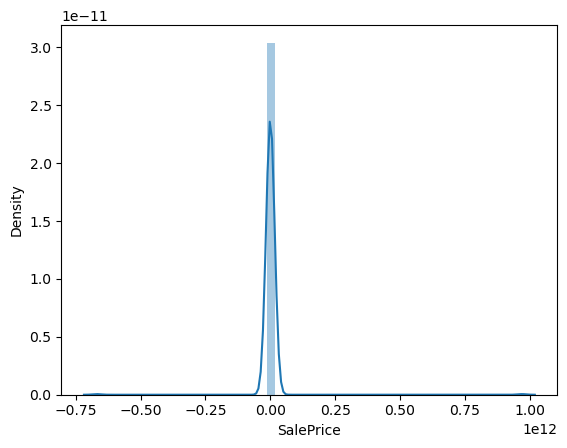

In [43]:
sns.distplot(error_term) ## error terms are normally distributed
plt.show()

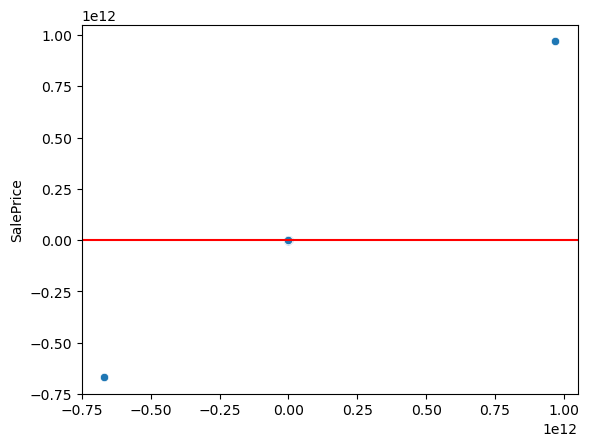

In [44]:
sns.scatterplot(x=y_test_pred,y=error_term)
plt.axhline(color='red')
plt.show()

In [45]:
### we can see a pattern like linear equation,which means overfitting is there

In [46]:
r2_score_test_linearregression = r2_score(y_pred=y_test_pred,y_true =y_test)
print(r2_score_test_linearregression)

mse_test_linearregression = mean_squared_error(y_pred=y_test_pred,y_true =y_test)
print(mse_test_linearregression)


rmse_test_linearregression = (mse_test_linearregression)**0.5
print(rmse_test_linearregression)

-2.6360178968245636e+21
3.16405966876269e+21
56249974833.4405


## Ridge Regularization

In [47]:
params ={
    'alpha' : np.linspace(0,10,100)
}
x_train_ridge = x_train
y_train_ridge = y_train
x_test_ridge = x_test
y_test_ridge = y_test

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)


model_cv.fit(x_train,y_train)

print(model_cv.best_params_,model_cv.best_estimator_,model_cv.best_score_)




Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'alpha': 5.05050505050505} Ridge(alpha=5.05050505050505) -0.2823644365232242


In [48]:
print(model_cv.best_params_,model_cv.best_estimator_,model_cv.best_score_)

{'alpha': 5.05050505050505} Ridge(alpha=5.05050505050505) -0.2823644365232242


In [49]:
####Since ridge best result is given at alpha = 5.05050505050505 ,hence we will try to compute ridge model with this value

ridge = Ridge(alpha=5.05050505050505)

ridge.fit(x_train_ridge,y_train_ridge)




Ridge(alpha=5.05050505050505)

In [50]:
y_train_ridge_predict = ridge.predict(x_train_ridge)

error_term = y_train_ridge - y_train_ridge_predict

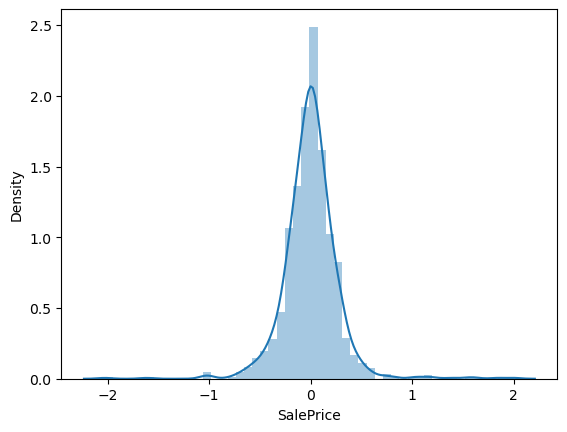

In [51]:
sns.distplot(error_term) ## error terms are normally distributed
plt.show()

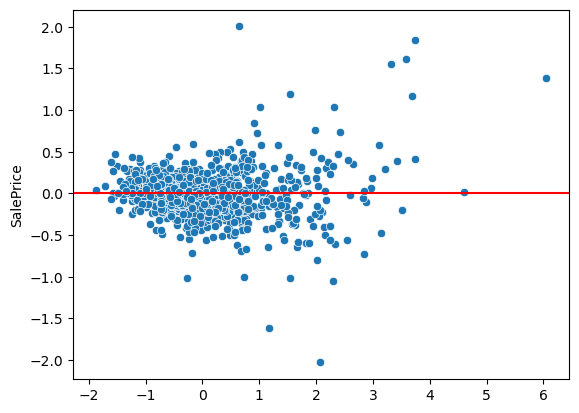

In [52]:
sns.scatterplot(x=y_train_ridge_predict,y=error_term)
plt.axhline(color='red')
plt.show()

In [53]:
r2_score_ridge_train = r2_score(y_pred=y_train_ridge_predict,y_true =y_train_ridge)
print(r2_score_ridge_train)

mse_train_ridge = mean_squared_error(y_pred=y_train_ridge_predict,y_true =y_train_ridge)
print(mse_train_ridge)

rmse_train_ridge = (mse_train_ridge)**0.5
print(rmse_train_ridge)

0.9248562964279664
0.07514370357203358
0.27412351882323704


In [54]:
#### creating ridge model for testing data


y_test_ridge_predict = ridge.predict(x_test_ridge)

error_term = y_test_ridge - y_test_ridge_predict

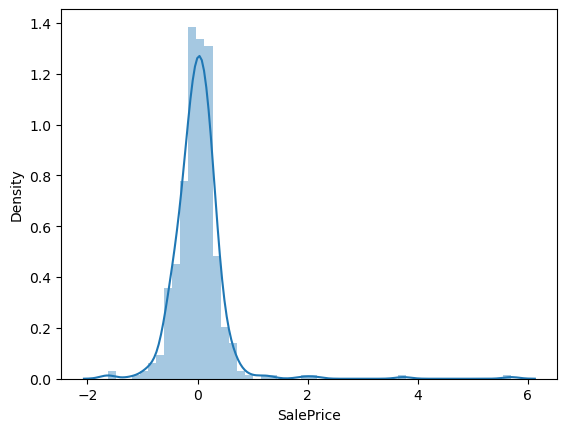

In [55]:
sns.distplot(error_term) ## error terms are normally distributed
plt.show()


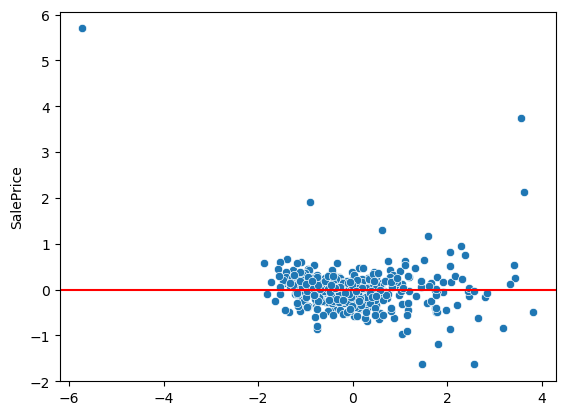

In [56]:
sns.scatterplot(x=y_test_ridge_predict,y=error_term)
plt.axhline(color='red')
plt.show()

In [57]:
r2_score_ridge_test = r2_score(y_pred=y_test_ridge_predict,y_true =y_test_ridge)
print(r2_score_ridge_test)

mse_test_ridge = mean_squared_error(y_pred=y_test_ridge_predict,y_true =y_test_ridge)
print(mse_test_ridge)

rmse_test_ridge = (mse_test_ridge)**0.5
print(rmse_test_ridge)

0.8067722897213534
0.2319346942661206
0.4815959865552459


In [58]:
#### Lasso Regression

In [59]:
params ={
    'alpha' : np.linspace(0,10,100)
}
x_train_lasso = x_train
y_train_lasso = y_train
x_test_lasso = x_test
y_test_lasso = y_test

lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)


model_cv.fit(x_train,y_train)

print(model_cv.best_params_,model_cv.best_estimator_,model_cv.best_score_)




Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'alpha': 0.10101010101010101} Lasso(alpha=0.10101010101010101) -0.3119091042943206


In [60]:
#### creating lasso model for testing data

lasso = Lasso(alpha=0.10101010101010101)

lasso.fit(x_train_lasso,y_train_lasso)

y_train_lasso_predict = lasso.predict(x_train_lasso)

error_term = y_train_lasso - y_train_lasso_predict

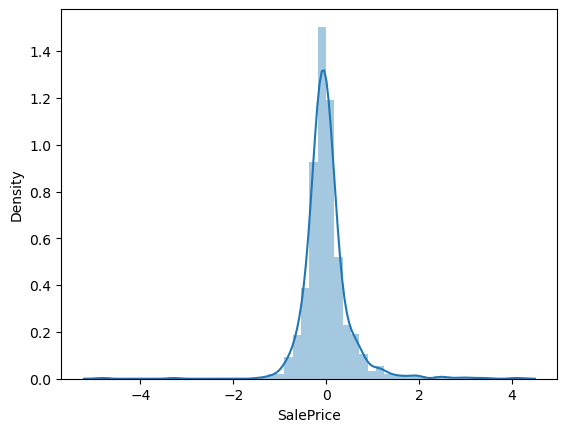

In [61]:
sns.distplot(error_term) ## error terms are normally distributed
plt.show()

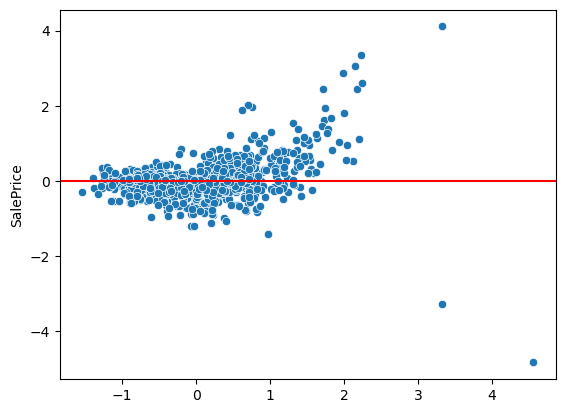

In [62]:
sns.scatterplot(x=y_train_lasso_predict,y=error_term)
plt.axhline(color='red')
plt.show()

In [63]:
r2_score_lasso_train = r2_score(y_pred=y_train_lasso_predict,y_true =y_train_lasso)
print(r2_score_lasso_train)

mse_train_lasso = mean_squared_error(y_pred=y_train_lasso_predict,y_true =y_train_lasso)
print(mse_train_lasso)

rmse_train_lasso = (mse_train_lasso)**0.5
print(rmse_train_lasso)

0.7457073173733859
0.254292682626614
0.5042744120284253


In [64]:
#### our Lasso regularization looks good .Now we need to tets this value in test data

In [65]:
y_test_predict_lasso = lasso.predict(x_test_lasso)
error_term = y_test_lasso - y_test_predict_lasso


In [66]:
r2_score_lasso_test = r2_score(y_pred=y_test_predict_lasso,y_true =y_test_lasso)
print(r2_score_lasso_test)

mse_lasso_test = mean_squared_error(y_pred=y_test_predict_lasso,y_true =y_test_lasso)
print(mse_lasso_test)

rmse_lasso_test =(mse_lasso_test)**0.5
print(rmse_lasso_test)

0.7723970064384111
0.27319596474871954
0.5226815136856473


In [67]:
##### overall Summary

list_values = [['r2_score_train',r2_score_train_linearRegression,r2_score_ridge_train,r2_score_lasso_train],
                ['r2_score_test',r2_score_test_linearregression,r2_score_ridge_test,r2_score_lasso_test],
               ['mse_score_train',mse_train_linearRegression,mse_train_ridge,mse_train_lasso],
               ['mse_score_test',mse_test_linearregression,mse_test_ridge,mse_lasso_test],
              ['rmse_score_train',rmse_train_linearRegression,rmse_train_ridge,rmse_train_lasso],
              ['rmse_score_test',rmse_test_linearregression,rmse_test_ridge,rmse_lasso_test]]

summary = pd.DataFrame(list_values,columns=['Parameter','Linear Regression','Ridge Regularization','Lasso Regularization'])
summary






,Parameter,Linear Regression,Ridge Regularization,Lasso Regularization
0,r2_score_train,9.285130e-01,0.924856,0.745707
1,r2_score_test,-2.636018e+21,0.806772,0.772397
2,mse_score_train,7.148703e-02,0.075144,0.254293
3,mse_score_test,3.164060e+21,0.231935,0.273196
4,rmse_score_train,2.673706e-01,0.274124,0.504274
5,rmse_score_test,5.624997e+10,0.481596,0.522682
